In [1]:
from scipy import ndimage
import pandas as pd
import numpy as np
from numpy import genfromtxt
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [3]:
x1 = genfromtxt('data_magV_1.5.csv', delimiter=',')
x2 = genfromtxt('data_magV_1.6.csv', delimiter=',')
x3 = genfromtxt('data_magV_1.7.csv', delimiter=',')
x4 = genfromtxt('data_magV_1.8.csv', delimiter=',')
x5 = genfromtxt('data_magV_1.9.csv', delimiter=',')
x6 = genfromtxt('data_magV_2.1.csv', delimiter=',')
x7 = genfromtxt('data_magV_2.2.csv', delimiter=',')
x8 = genfromtxt('data_magV_2.3.csv', delimiter=',')
x9 = genfromtxt('data_magV_2.4.csv', delimiter=',')
x10 = genfromtxt('data_magV_2.5.csv', delimiter=',')
x11 = genfromtxt('data_magV_2.6.csv', delimiter=',')
x1 = x1.astype('float32')
x2 = x2.astype('float32')
x3 = x3.astype('float32')
x4 = x4.astype('float32')
x5 = x5.astype('float32')
x6 = x6.astype('float32')
x7 = x7.astype('float32')
x8 = x8.astype('float32')
x9 = x9.astype('float32')
x10 = x10.astype('float32')
x11 = x11.astype('float32')

x_train = np.vstack((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11))
x_train = np.reshape(x_train, (11, 100, 100, 1))

x_test = genfromtxt('data_magV_2.0.csv', delimiter=',')
x_test = x_test.astype('float32')
x_test = np.reshape(x_test, (1, 100, 100, 1))

In [4]:
tsr_train = np.array([1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6])
tsr_test = np.array([2.0])

tsr_train = np.reshape(tsr_train, (11, 1, 1, 1))
tsr_test = np.reshape(tsr_test, (1, 1, 1, 1))

In [5]:
input_img = tf.keras.Input(shape=(100, 100, 1), name='input_img')
input_tsr = tf.keras.Input(shape=(1, 1, 1), name='input_tsr')

x = tf.keras.layers.Conv2D(300, (5, 5), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(input_img)
x = tf.keras.layers.MaxPooling2D((5, 5), padding='same')(x)
x = tf.keras.layers.Conv2D(300, (5, 5), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(300, (5, 5), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

reshape1 = tf.keras.layers.Reshape((encoded.shape[1]*encoded.shape[2]*encoded.shape[3], 1))(encoded)
reshape2 = tf.keras.layers.Reshape((input_tsr.shape[1]*input_tsr.shape[2]*input_tsr.shape[3], 1))(input_tsr)
concatt = tf.keras.layers.Concatenate(axis=1)([reshape1, reshape2])
flatten = tf.keras.layers.Flatten()(concatt)
out = tf.keras.layers.Dense(encoded.shape[1]*encoded.shape[2]*encoded.shape[3], activation='relu')(flatten)
reshape = tf.keras.layers.Reshape((encoded.shape[1], encoded.shape[2], encoded.shape[3]))(out)

x = tf.keras.layers.Conv2D(300, (5, 5), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(reshape)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(300, (5, 5), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(300, (5, 5), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(x)
x = tf.keras.layers.UpSampling2D((5, 5))(x)
decoded = tf.keras.layers.Conv2D(1, (5, 5), activation=None, padding='same')(x)

# 오토인코더 = 인코더 + 디코더
autoencoder = tf.keras.Model([input_img, input_tsr], decoded)

In [6]:
autoencoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 100, 100, 30  7800        ['input_img[0][0]']              
                                0)                                                                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 20, 20, 300)  0           ['conv2d[0][0]']                 
                                                                                              

In [7]:
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(0.001),
                    loss = tf.keras.losses.MeanSquaredError(),
                    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
                            tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
                            tf.keras.metrics.RootMeanSquaredError(name="rmse"),
                            tf.keras.metrics.MeanSquaredLogarithmicError(name="msle")])

In [8]:
history = autoencoder.fit([x_train, tsr_train], x_train, epochs=5000, shuffle=True)

Epoch 1/5000
1/1 [==============================] - 4s 4s/step - loss: 55.7635 - mae: 7.0924 - mape: 100.4533 - rmse: 7.4665 - msle: 4.2481
Epoch 2/5000
1/1 [==============================] - 0s 71ms/step - loss: 576488.1250 - mae: 690.0840 - mape: 12115.4678 - rmse: 759.2681 - msle: 19.7147
Epoch 3/5000
1/1 [==============================] - 0s 72ms/step - loss: 50.7707 - mae: 6.7017 - mape: 93.6673 - rmse: 7.1243 - msle: 3.1519
Epoch 4/5000
1/1 [==============================] - 0s 79ms/step - loss: 55.2079 - mae: 7.0495 - mape: 99.6909 - rmse: 7.4292 - msle: 4.1905
Epoch 5/5000
1/1 [==============================] - 0s 77ms/step - loss: 55.1261 - mae: 7.0457 - mape: 99.6652 - rmse: 7.4237 - msle: 4.1722
Epoch 6/5000
1/1 [==============================] - 0s 72ms/step - loss: 53.5042 - mae: 6.9327 - mape: 97.8989 - rmse: 7.3136 - msle: 3.7719
Epoch 7/5000
1/1 [==============================] - 0s 77ms/step - loss: 45.8940 - mae: 6.3118 - mape: 87.3843 - rmse: 6.7734 - msle: 2.4971
Ep

1/1 [==============================] - 0s 75ms/step - loss: 0.8318 - mae: 0.7211 - mape: 11.4989 - rmse: 0.9030 - msle: 0.0151
Epoch 60/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.8118 - mae: 0.7150 - mape: 11.4926 - rmse: 0.8919 - msle: 0.0149
Epoch 61/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.7959 - mae: 0.7123 - mape: 11.5582 - rmse: 0.8829 - msle: 0.0148
Epoch 62/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.7982 - mae: 0.7127 - mape: 11.5301 - rmse: 0.8842 - msle: 0.0149
Epoch 63/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.7988 - mae: 0.7117 - mape: 11.4888 - rmse: 0.8846 - msle: 0.0149
Epoch 64/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.7786 - mae: 0.7043 - mape: 11.4926 - rmse: 0.8731 - msle: 0.0147
Epoch 65/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.7735 - mae: 0.7023 - mape: 11.5366 - rmse: 0.8702 - msle: 0.0147
Epoch 66/5000
1/1 [========

1/1 [==============================] - 0s 70ms/step - loss: 0.6906 - mae: 0.6683 - mape: 11.3307 - rmse: 0.8213 - msle: 0.0141
Epoch 118/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.7196 - mae: 0.6663 - mape: 10.8434 - rmse: 0.8388 - msle: 0.0139
Epoch 119/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.7015 - mae: 0.6748 - mape: 11.4472 - rmse: 0.8280 - msle: 0.0143
Epoch 120/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.6712 - mae: 0.6507 - mape: 10.9022 - rmse: 0.8094 - msle: 0.0136
Epoch 121/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.6853 - mae: 0.6526 - mape: 10.7952 - rmse: 0.8181 - msle: 0.0136
Epoch 122/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.6977 - mae: 0.6727 - mape: 11.4249 - rmse: 0.8257 - msle: 0.0143
Epoch 123/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.6785 - mae: 0.6502 - mape: 10.7942 - rmse: 0.8140 - msle: 0.0136
Epoch 124/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.6694 - mae: 0.6615 - mape: 11.1356 - rmse: 0.8085 - msle: 0.0132
Epoch 175/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.6232 - mae: 0.6109 - mape: 9.7845 - rmse: 0.7794 - msle: 0.0118
Epoch 176/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.5575 - mae: 0.5846 - mape: 9.8710 - rmse: 0.7360 - msle: 0.0114
Epoch 177/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.5742 - mae: 0.5986 - mape: 10.1556 - rmse: 0.7473 - msle: 0.0117
Epoch 178/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.6562 - mae: 0.6278 - mape: 9.8717 - rmse: 0.8003 - msle: 0.0120
Epoch 179/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.7102 - mae: 0.6849 - mape: 11.5245 - rmse: 0.8334 - msle: 0.0138
Epoch 180/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.6810 - mae: 0.6436 - mape: 9.9939 - rmse: 0.8156 - msle: 0.0122
Epoch 181/5000
1/1 [=====

1/1 [==============================] - 0s 70ms/step - loss: 0.5538 - mae: 0.5879 - mape: 9.9169 - rmse: 0.7336 - msle: 0.0111
Epoch 233/5000
1/1 [==============================] - 0s 73ms/step - loss: 0.4787 - mae: 0.5269 - mape: 8.6366 - rmse: 0.6805 - msle: 0.0096
Epoch 234/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.4450 - mae: 0.5061 - mape: 8.5467 - rmse: 0.6554 - msle: 0.0093
Epoch 235/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.4737 - mae: 0.5304 - mape: 9.0356 - rmse: 0.6769 - msle: 0.0099
Epoch 236/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.5238 - mae: 0.5579 - mape: 8.8867 - rmse: 0.7129 - msle: 0.0100
Epoch 237/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.5212 - mae: 0.5672 - mape: 9.6018 - rmse: 0.7111 - msle: 0.0106
Epoch 238/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.4903 - mae: 0.5357 - mape: 8.6651 - rmse: 0.6890 - msle: 0.0096
Epoch 239/5000
1/1 [========

1/1 [==============================] - 0s 73ms/step - loss: 0.3593 - mae: 0.4360 - mape: 7.3113 - rmse: 0.5865 - msle: 0.0075
Epoch 291/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.3556 - mae: 0.4328 - mape: 7.3017 - rmse: 0.5833 - msle: 0.0075
Epoch 292/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.3630 - mae: 0.4400 - mape: 7.4811 - rmse: 0.5896 - msle: 0.0076
Epoch 293/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.3748 - mae: 0.4494 - mape: 7.4010 - rmse: 0.5995 - msle: 0.0076
Epoch 294/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.3814 - mae: 0.4560 - mape: 7.7662 - rmse: 0.6050 - msle: 0.0080
Epoch 295/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.3822 - mae: 0.4556 - mape: 7.4545 - rmse: 0.6057 - msle: 0.0077
Epoch 296/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.3731 - mae: 0.4505 - mape: 7.6497 - rmse: 0.5981 - msle: 0.0078
Epoch 297/5000
1/1 [========

1/1 [==============================] - 0s 71ms/step - loss: 0.3348 - mae: 0.4129 - mape: 7.0372 - rmse: 0.5654 - msle: 0.0071
Epoch 349/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.3515 - mae: 0.4278 - mape: 7.1108 - rmse: 0.5800 - msle: 0.0073
Epoch 350/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.3653 - mae: 0.4410 - mape: 7.6363 - rmse: 0.5918 - msle: 0.0079
Epoch 351/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.3556 - mae: 0.4337 - mape: 7.1371 - rmse: 0.5835 - msle: 0.0072
Epoch 352/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.3353 - mae: 0.4170 - mape: 7.0835 - rmse: 0.5658 - msle: 0.0071
Epoch 353/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.3287 - mae: 0.4091 - mape: 6.9536 - rmse: 0.5600 - msle: 0.0070
Epoch 354/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.3398 - mae: 0.4230 - mape: 7.0167 - rmse: 0.5698 - msle: 0.0070
Epoch 355/5000
1/1 [========

1/1 [==============================] - 0s 69ms/step - loss: 0.4324 - mae: 0.5099 - mape: 7.9653 - rmse: 0.6461 - msle: 0.0082
Epoch 407/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.3367 - mae: 0.4270 - mape: 7.1027 - rmse: 0.5671 - msle: 0.0069
Epoch 408/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.3120 - mae: 0.3939 - mape: 6.7646 - rmse: 0.5450 - msle: 0.0067
Epoch 409/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.3612 - mae: 0.4487 - mape: 7.1494 - rmse: 0.5884 - msle: 0.0070
Epoch 410/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.3924 - mae: 0.4830 - mape: 7.9799 - rmse: 0.6143 - msle: 0.0078
Epoch 411/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.4003 - mae: 0.4774 - mape: 7.5512 - rmse: 0.6208 - msle: 0.0077
Epoch 412/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.3450 - mae: 0.4283 - mape: 7.2876 - rmse: 0.5745 - msle: 0.0072
Epoch 413/5000
1/1 [========

1/1 [==============================] - 0s 71ms/step - loss: 0.3106 - mae: 0.3997 - mape: 6.8139 - rmse: 0.5439 - msle: 0.0066
Epoch 465/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.3181 - mae: 0.4084 - mape: 6.6722 - rmse: 0.5507 - msle: 0.0065
Epoch 466/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.3183 - mae: 0.4075 - mape: 6.9285 - rmse: 0.5508 - msle: 0.0067
Epoch 467/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.3193 - mae: 0.4096 - mape: 6.6949 - rmse: 0.5518 - msle: 0.0065
Epoch 468/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.3131 - mae: 0.4025 - mape: 6.8545 - rmse: 0.5462 - msle: 0.0066
Epoch 469/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.3089 - mae: 0.3976 - mape: 6.5511 - rmse: 0.5423 - msle: 0.0064
Epoch 470/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.3007 - mae: 0.3886 - mape: 6.6437 - rmse: 0.5346 - msle: 0.0064
Epoch 471/5000
1/1 [========

1/1 [==============================] - 0s 69ms/step - loss: 0.2841 - mae: 0.3719 - mape: 6.2276 - rmse: 0.5191 - msle: 0.0060
Epoch 523/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.2787 - mae: 0.3681 - mape: 6.3030 - rmse: 0.5138 - msle: 0.0060
Epoch 524/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2759 - mae: 0.3665 - mape: 6.1699 - rmse: 0.5111 - msle: 0.0058
Epoch 525/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2714 - mae: 0.3584 - mape: 6.1612 - rmse: 0.5067 - msle: 0.0059
Epoch 526/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2703 - mae: 0.3570 - mape: 6.0824 - rmse: 0.5056 - msle: 0.0058
Epoch 527/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.2683 - mae: 0.3550 - mape: 6.0866 - rmse: 0.5036 - msle: 0.0058
Epoch 528/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2686 - mae: 0.3555 - mape: 6.1050 - rmse: 0.5039 - msle: 0.0058
Epoch 529/5000
1/1 [========

1/1 [==============================] - 0s 72ms/step - loss: 0.2588 - mae: 0.3493 - mape: 6.0017 - rmse: 0.4943 - msle: 0.0056
Epoch 581/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2612 - mae: 0.3537 - mape: 5.9373 - rmse: 0.4967 - msle: 0.0055
Epoch 582/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.2641 - mae: 0.3555 - mape: 6.1081 - rmse: 0.4996 - msle: 0.0057
Epoch 583/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.2690 - mae: 0.3633 - mape: 6.0464 - rmse: 0.5045 - msle: 0.0056
Epoch 584/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.2743 - mae: 0.3694 - mape: 6.3137 - rmse: 0.5097 - msle: 0.0059
Epoch 585/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2843 - mae: 0.3826 - mape: 6.2466 - rmse: 0.5194 - msle: 0.0058
Epoch 586/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2950 - mae: 0.3943 - mape: 6.6639 - rmse: 0.5296 - msle: 0.0062
Epoch 587/5000
1/1 [========

1/1 [==============================] - 0s 70ms/step - loss: 0.2356 - mae: 0.3261 - mape: 5.5755 - rmse: 0.4703 - msle: 0.0051
Epoch 639/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2364 - mae: 0.3274 - mape: 5.6177 - rmse: 0.4711 - msle: 0.0051
Epoch 640/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2392 - mae: 0.3323 - mape: 5.6118 - rmse: 0.4742 - msle: 0.0051
Epoch 641/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2434 - mae: 0.3373 - mape: 5.7760 - rmse: 0.4786 - msle: 0.0052
Epoch 642/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2502 - mae: 0.3481 - mape: 5.7740 - rmse: 0.4856 - msle: 0.0052
Epoch 643/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.2581 - mae: 0.3565 - mape: 6.0763 - rmse: 0.4937 - msle: 0.0055
Epoch 644/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2724 - mae: 0.3751 - mape: 6.1077 - rmse: 0.5079 - msle: 0.0055
Epoch 645/5000
1/1 [========

1/1 [==============================] - 0s 71ms/step - loss: 0.2193 - mae: 0.3113 - mape: 5.3106 - rmse: 0.4528 - msle: 0.0047
Epoch 697/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2185 - mae: 0.3108 - mape: 5.2941 - rmse: 0.4520 - msle: 0.0047
Epoch 698/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.2186 - mae: 0.3106 - mape: 5.3194 - rmse: 0.4521 - msle: 0.0047
Epoch 699/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2196 - mae: 0.3121 - mape: 5.3043 - rmse: 0.4531 - msle: 0.0047
Epoch 700/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2206 - mae: 0.3134 - mape: 5.3800 - rmse: 0.4543 - msle: 0.0047
Epoch 701/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.2233 - mae: 0.3188 - mape: 5.3570 - rmse: 0.4572 - msle: 0.0047
Epoch 702/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.2319 - mae: 0.3315 - mape: 5.6310 - rmse: 0.4665 - msle: 0.0049
Epoch 703/5000
1/1 [========

1/1 [==============================] - 0s 70ms/step - loss: 0.3036 - mae: 0.4154 - mape: 6.3845 - rmse: 0.5380 - msle: 0.0056
Epoch 755/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.7001 - mae: 0.7140 - mape: 11.1730 - rmse: 0.8282 - msle: 0.0115
Epoch 756/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.4283 - mae: 0.5245 - mape: 8.0197 - rmse: 0.6435 - msle: 0.0079
Epoch 757/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.3337 - mae: 0.4431 - mape: 6.8179 - rmse: 0.5653 - msle: 0.0061
Epoch 758/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.6260 - mae: 0.6712 - mape: 10.8000 - rmse: 0.7822 - msle: 0.0111
Epoch 759/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.3078 - mae: 0.4181 - mape: 6.4629 - rmse: 0.5419 - msle: 0.0057
Epoch 760/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.3615 - mae: 0.4675 - mape: 7.2109 - rmse: 0.5894 - msle: 0.0067
Epoch 761/5000
1/1 [======

1/1 [==============================] - 0s 71ms/step - loss: 0.2063 - mae: 0.3000 - mape: 5.1043 - rmse: 0.4385 - msle: 0.0044
Epoch 813/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.2061 - mae: 0.3001 - mape: 5.0826 - rmse: 0.4383 - msle: 0.0043
Epoch 814/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.2059 - mae: 0.2992 - mape: 5.1039 - rmse: 0.4380 - msle: 0.0044
Epoch 815/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2055 - mae: 0.2988 - mape: 5.0793 - rmse: 0.4376 - msle: 0.0043
Epoch 816/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.2051 - mae: 0.2986 - mape: 5.0710 - rmse: 0.4371 - msle: 0.0043
Epoch 817/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.2055 - mae: 0.2991 - mape: 5.0953 - rmse: 0.4376 - msle: 0.0044
Epoch 818/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.2044 - mae: 0.2978 - mape: 5.0651 - rmse: 0.4364 - msle: 0.0043
Epoch 819/5000
1/1 [========

1/1 [==============================] - 0s 71ms/step - loss: 0.2001 - mae: 0.2978 - mape: 5.0130 - rmse: 0.4315 - msle: 0.0042
Epoch 871/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.2018 - mae: 0.3010 - mape: 5.0620 - rmse: 0.4335 - msle: 0.0042
Epoch 872/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.1963 - mae: 0.2897 - mape: 4.9097 - rmse: 0.4271 - msle: 0.0041
Epoch 873/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2000 - mae: 0.2974 - mape: 5.0462 - rmse: 0.4314 - msle: 0.0042
Epoch 874/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1958 - mae: 0.2887 - mape: 4.9409 - rmse: 0.4265 - msle: 0.0042
Epoch 875/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1998 - mae: 0.2959 - mape: 5.0116 - rmse: 0.4312 - msle: 0.0042
Epoch 876/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1942 - mae: 0.2877 - mape: 4.8950 - rmse: 0.4247 - msle: 0.0041
Epoch 877/5000
1/1 [========

1/1 [==============================] - 0s 69ms/step - loss: 0.1860 - mae: 0.2796 - mape: 4.7309 - rmse: 0.4150 - msle: 0.0039
Epoch 929/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1870 - mae: 0.2798 - mape: 4.7913 - rmse: 0.4162 - msle: 0.0040
Epoch 930/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1874 - mae: 0.2819 - mape: 4.7599 - rmse: 0.4167 - msle: 0.0039
Epoch 931/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1877 - mae: 0.2806 - mape: 4.8122 - rmse: 0.4170 - msle: 0.0040
Epoch 932/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1864 - mae: 0.2805 - mape: 4.7417 - rmse: 0.4155 - msle: 0.0039
Epoch 933/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1846 - mae: 0.2770 - mape: 4.7387 - rmse: 0.4133 - msle: 0.0039
Epoch 934/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1832 - mae: 0.2761 - mape: 4.6855 - rmse: 0.4117 - msle: 0.0039
Epoch 935/5000
1/1 [========

1/1 [==============================] - 0s 71ms/step - loss: 0.2175 - mae: 0.3324 - mape: 5.5364 - rmse: 0.4515 - msle: 0.0044
Epoch 987/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.2157 - mae: 0.3301 - mape: 5.3107 - rmse: 0.4495 - msle: 0.0042
Epoch 988/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.2042 - mae: 0.3126 - mape: 5.2796 - rmse: 0.4365 - msle: 0.0043
Epoch 989/5000
1/1 [==============================] - 0s 75ms/step - loss: 0.1957 - mae: 0.3008 - mape: 4.9523 - rmse: 0.4266 - msle: 0.0040
Epoch 990/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1846 - mae: 0.2825 - mape: 4.8186 - rmse: 0.4135 - msle: 0.0039
Epoch 991/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1780 - mae: 0.2734 - mape: 4.5916 - rmse: 0.4054 - msle: 0.0037
Epoch 992/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1751 - mae: 0.2676 - mape: 4.5514 - rmse: 0.4018 - msle: 0.0037
Epoch 993/5000
1/1 [========

1/1 [==============================] - 0s 70ms/step - loss: 0.1758 - mae: 0.2744 - mape: 4.5696 - rmse: 0.4028 - msle: 0.0036
Epoch 1044/5000
1/1 [==============================] - 0s 73ms/step - loss: 0.1696 - mae: 0.2626 - mape: 4.4631 - rmse: 0.3950 - msle: 0.0035
Epoch 1045/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.1704 - mae: 0.2635 - mape: 4.4912 - rmse: 0.3960 - msle: 0.0036
Epoch 1046/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1754 - mae: 0.2738 - mape: 4.5702 - rmse: 0.4023 - msle: 0.0036
Epoch 1047/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1806 - mae: 0.2824 - mape: 4.7608 - rmse: 0.4088 - msle: 0.0037
Epoch 1048/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.1849 - mae: 0.2911 - mape: 4.7641 - rmse: 0.4140 - msle: 0.0037
Epoch 1049/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1838 - mae: 0.2880 - mape: 4.8385 - rmse: 0.4127 - msle: 0.0038
Epoch 1050/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.1829 - mae: 0.2873 - mape: 4.8660 - rmse: 0.4117 - msle: 0.0038
Epoch 1101/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1992 - mae: 0.3114 - mape: 5.0785 - rmse: 0.4310 - msle: 0.0040
Epoch 1102/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1962 - mae: 0.3091 - mape: 5.1915 - rmse: 0.4275 - msle: 0.0040
Epoch 1103/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1905 - mae: 0.3042 - mape: 4.8838 - rmse: 0.4208 - msle: 0.0037
Epoch 1104/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1774 - mae: 0.2832 - mape: 4.7237 - rmse: 0.4049 - msle: 0.0036
Epoch 1105/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1670 - mae: 0.2645 - mape: 4.4097 - rmse: 0.3918 - msle: 0.0034
Epoch 1106/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.1628 - mae: 0.2557 - mape: 4.3265 - rmse: 0.3864 - msle: 0.0034
Epoch 1107/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.2982 - mae: 0.4269 - mape: 7.1097 - rmse: 0.5337 - msle: 0.0059
Epoch 1158/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2368 - mae: 0.3562 - mape: 5.7976 - rmse: 0.4727 - msle: 0.0047
Epoch 1159/5000
1/1 [==============================] - 0s 68ms/step - loss: 0.1730 - mae: 0.2782 - mape: 4.6081 - rmse: 0.3996 - msle: 0.0035
Epoch 1160/5000
1/1 [==============================] - 0s 73ms/step - loss: 0.2034 - mae: 0.3122 - mape: 5.4114 - rmse: 0.4359 - msle: 0.0043
Epoch 1161/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2505 - mae: 0.3821 - mape: 5.7682 - rmse: 0.4870 - msle: 0.0044
Epoch 1162/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.2495 - mae: 0.3783 - mape: 5.9332 - rmse: 0.4860 - msle: 0.0045
Epoch 1163/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.2048 - mae: 0.3232 - mape: 5.2029 - rmse: 0.4376 - msle: 0.0040
Epoch 1164/5000
1/1 [=

1/1 [==============================] - 0s 70ms/step - loss: 0.1517 - mae: 0.2440 - mape: 4.1465 - rmse: 0.3721 - msle: 0.0031
Epoch 1215/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1519 - mae: 0.2451 - mape: 4.1348 - rmse: 0.3723 - msle: 0.0031
Epoch 1216/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1522 - mae: 0.2452 - mape: 4.1643 - rmse: 0.3727 - msle: 0.0031
Epoch 1217/5000
1/1 [==============================] - 0s 68ms/step - loss: 0.1528 - mae: 0.2472 - mape: 4.1609 - rmse: 0.3736 - msle: 0.0031
Epoch 1218/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.1532 - mae: 0.2471 - mape: 4.2029 - rmse: 0.3742 - msle: 0.0032
Epoch 1219/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1544 - mae: 0.2500 - mape: 4.1897 - rmse: 0.3757 - msle: 0.0031
Epoch 1220/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1545 - mae: 0.2500 - mape: 4.2439 - rmse: 0.3759 - msle: 0.0032
Epoch 1221/5000
1/1 [=

1/1 [==============================] - 0s 70ms/step - loss: 0.2238 - mae: 0.3610 - mape: 5.5888 - rmse: 0.4590 - msle: 0.0041
Epoch 1272/5000
1/1 [==============================] - 0s 73ms/step - loss: 0.2350 - mae: 0.3733 - mape: 5.9927 - rmse: 0.4710 - msle: 0.0044
Epoch 1273/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2675 - mae: 0.4109 - mape: 6.2196 - rmse: 0.5043 - msle: 0.0047
Epoch 1274/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.2662 - mae: 0.4080 - mape: 6.4967 - rmse: 0.5031 - msle: 0.0049
Epoch 1275/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.2898 - mae: 0.4345 - mape: 6.5646 - rmse: 0.5260 - msle: 0.0051
Epoch 1276/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2620 - mae: 0.4036 - mape: 6.4489 - rmse: 0.4989 - msle: 0.0048
Epoch 1277/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2528 - mae: 0.3952 - mape: 6.0466 - rmse: 0.4895 - msle: 0.0045
Epoch 1278/5000
1/1 [=

1/1 [==============================] - 0s 72ms/step - loss: 0.1444 - mae: 0.2387 - mape: 4.0475 - rmse: 0.3624 - msle: 0.0030
Epoch 1329/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1636 - mae: 0.2744 - mape: 4.4285 - rmse: 0.3880 - msle: 0.0032
Epoch 1330/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.1866 - mae: 0.3119 - mape: 5.0798 - rmse: 0.4165 - msle: 0.0036
Epoch 1331/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.2093 - mae: 0.3425 - mape: 5.3100 - rmse: 0.4430 - msle: 0.0038
Epoch 1332/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.2005 - mae: 0.3315 - mape: 5.3657 - rmse: 0.4330 - msle: 0.0038
Epoch 1333/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1889 - mae: 0.3162 - mape: 4.9886 - rmse: 0.4194 - msle: 0.0035
Epoch 1334/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1634 - mae: 0.2742 - mape: 4.5685 - rmse: 0.3877 - msle: 0.0033
Epoch 1335/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.2316 - mae: 0.3701 - mape: 5.5674 - rmse: 0.4676 - msle: 0.0040
Epoch 1386/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2128 - mae: 0.3488 - mape: 5.6126 - rmse: 0.4470 - msle: 0.0040
Epoch 1387/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1951 - mae: 0.3223 - mape: 5.1718 - rmse: 0.4268 - msle: 0.0038
Epoch 1388/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1542 - mae: 0.2594 - mape: 4.3516 - rmse: 0.3758 - msle: 0.0031
Epoch 1389/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1426 - mae: 0.2390 - mape: 4.0067 - rmse: 0.3601 - msle: 0.0029
Epoch 1390/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1496 - mae: 0.2496 - mape: 4.1184 - rmse: 0.3696 - msle: 0.0029
Epoch 1391/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1681 - mae: 0.2881 - mape: 4.6685 - rmse: 0.3939 - msle: 0.0032
Epoch 1392/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.1328 - mae: 0.2238 - mape: 3.7406 - rmse: 0.3463 - msle: 0.0026
Epoch 1443/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.1342 - mae: 0.2270 - mape: 3.8187 - rmse: 0.3482 - msle: 0.0027
Epoch 1444/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1375 - mae: 0.2362 - mape: 3.8869 - rmse: 0.3530 - msle: 0.0027
Epoch 1445/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1448 - mae: 0.2497 - mape: 4.1321 - rmse: 0.3633 - msle: 0.0029
Epoch 1446/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1606 - mae: 0.2787 - mape: 4.4390 - rmse: 0.3843 - msle: 0.0030
Epoch 1447/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.1879 - mae: 0.3195 - mape: 5.2345 - rmse: 0.4184 - msle: 0.0037
Epoch 1448/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2528 - mae: 0.4021 - mape: 6.1974 - rmse: 0.4899 - msle: 0.0046
Epoch 1449/5000
1/1 [=

1/1 [==============================] - 0s 70ms/step - loss: 0.1310 - mae: 0.2210 - mape: 3.7257 - rmse: 0.3438 - msle: 0.0026
Epoch 1500/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1329 - mae: 0.2273 - mape: 3.7723 - rmse: 0.3465 - msle: 0.0026
Epoch 1501/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1327 - mae: 0.2257 - mape: 3.7904 - rmse: 0.3463 - msle: 0.0027
Epoch 1502/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.1313 - mae: 0.2231 - mape: 3.7137 - rmse: 0.3443 - msle: 0.0026
Epoch 1503/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1295 - mae: 0.2186 - mape: 3.6839 - rmse: 0.3416 - msle: 0.0026
Epoch 1504/5000
1/1 [==============================] - 0s 73ms/step - loss: 0.1289 - mae: 0.2176 - mape: 3.6613 - rmse: 0.3407 - msle: 0.0026
Epoch 1505/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1294 - mae: 0.2191 - mape: 3.6648 - rmse: 0.3415 - msle: 0.0026
Epoch 1506/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.1406 - mae: 0.2465 - mape: 4.0841 - rmse: 0.3576 - msle: 0.0028
Epoch 1557/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1443 - mae: 0.2545 - mape: 4.1192 - rmse: 0.3627 - msle: 0.0028
Epoch 1558/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1439 - mae: 0.2534 - mape: 4.1991 - rmse: 0.3622 - msle: 0.0028
Epoch 1559/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1470 - mae: 0.2609 - mape: 4.1286 - rmse: 0.3664 - msle: 0.0027
Epoch 1560/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1479 - mae: 0.2614 - mape: 4.2725 - rmse: 0.3676 - msle: 0.0029
Epoch 1561/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1512 - mae: 0.2683 - mape: 4.2458 - rmse: 0.3722 - msle: 0.0028
Epoch 1562/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.1513 - mae: 0.2678 - mape: 4.3715 - rmse: 0.3723 - msle: 0.0029
Epoch 1563/5000
1/1 [=

1/1 [==============================] - 0s 70ms/step - loss: 0.1944 - mae: 0.3335 - mape: 5.3426 - rmse: 0.4263 - msle: 0.0036
Epoch 1614/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1682 - mae: 0.2932 - mape: 4.5928 - rmse: 0.3944 - msle: 0.0031
Epoch 1615/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1312 - mae: 0.2300 - mape: 3.7913 - rmse: 0.3444 - msle: 0.0025
Epoch 1616/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1285 - mae: 0.2222 - mape: 3.7209 - rmse: 0.3404 - msle: 0.0025
Epoch 1617/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1532 - mae: 0.2725 - mape: 4.2739 - rmse: 0.3749 - msle: 0.0028
Epoch 1618/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1648 - mae: 0.2906 - mape: 4.6997 - rmse: 0.3900 - msle: 0.0031
Epoch 1619/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1573 - mae: 0.2781 - mape: 4.3445 - rmse: 0.3803 - msle: 0.0029
Epoch 1620/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.1217 - mae: 0.2124 - mape: 3.5473 - rmse: 0.3304 - msle: 0.0024
Epoch 1671/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1227 - mae: 0.2156 - mape: 3.5243 - rmse: 0.3319 - msle: 0.0023
Epoch 1672/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1232 - mae: 0.2164 - mape: 3.5944 - rmse: 0.3327 - msle: 0.0024
Epoch 1673/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1242 - mae: 0.2203 - mape: 3.5875 - rmse: 0.3342 - msle: 0.0024
Epoch 1674/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.1252 - mae: 0.2206 - mape: 3.6627 - rmse: 0.3357 - msle: 0.0024
Epoch 1675/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1279 - mae: 0.2273 - mape: 3.6975 - rmse: 0.3396 - msle: 0.0024
Epoch 1676/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.1286 - mae: 0.2284 - mape: 3.7994 - rmse: 0.3406 - msle: 0.0025
Epoch 1677/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.1279 - mae: 0.2292 - mape: 3.7082 - rmse: 0.3397 - msle: 0.0024
Epoch 1728/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1349 - mae: 0.2443 - mape: 4.0077 - rmse: 0.3499 - msle: 0.0026
Epoch 1729/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.1508 - mae: 0.2756 - mape: 4.2768 - rmse: 0.3720 - msle: 0.0027
Epoch 1730/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1700 - mae: 0.3056 - mape: 4.8798 - rmse: 0.3969 - msle: 0.0031
Epoch 1731/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.2144 - mae: 0.3653 - mape: 5.5495 - rmse: 0.4494 - msle: 0.0037
Epoch 1732/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2530 - mae: 0.4102 - mape: 6.4239 - rmse: 0.4904 - msle: 0.0044
Epoch 1733/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.3587 - mae: 0.5154 - mape: 7.6220 - rmse: 0.5885 - msle: 0.0060
Epoch 1734/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.1120 - mae: 0.1940 - mape: 3.2232 - rmse: 0.3156 - msle: 0.0021
Epoch 1785/5000
1/1 [==============================] - 0s 74ms/step - loss: 0.1120 - mae: 0.1942 - mape: 3.2238 - rmse: 0.3157 - msle: 0.0021
Epoch 1786/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.1126 - mae: 0.1953 - mape: 3.2555 - rmse: 0.3166 - msle: 0.0022
Epoch 1787/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1134 - mae: 0.1977 - mape: 3.2651 - rmse: 0.3178 - msle: 0.0022
Epoch 1788/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1141 - mae: 0.1987 - mape: 3.3147 - rmse: 0.3189 - msle: 0.0022
Epoch 1789/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1146 - mae: 0.2013 - mape: 3.3140 - rmse: 0.3197 - msle: 0.0022
Epoch 1790/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1140 - mae: 0.1993 - mape: 3.3194 - rmse: 0.3188 - msle: 0.0022
Epoch 1791/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.1440 - mae: 0.2636 - mape: 4.2722 - rmse: 0.3629 - msle: 0.0027
Epoch 1842/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1457 - mae: 0.2674 - mape: 4.1492 - rmse: 0.3653 - msle: 0.0026
Epoch 1843/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1331 - mae: 0.2452 - mape: 3.9211 - rmse: 0.3476 - msle: 0.0025
Epoch 1844/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1203 - mae: 0.2190 - mape: 3.4938 - rmse: 0.3286 - msle: 0.0022
Epoch 1845/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1120 - mae: 0.1952 - mape: 3.2604 - rmse: 0.3157 - msle: 0.0022
Epoch 1846/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1119 - mae: 0.1968 - mape: 3.2342 - rmse: 0.3155 - msle: 0.0021
Epoch 1847/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1158 - mae: 0.2068 - mape: 3.3513 - rmse: 0.3217 - msle: 0.0022
Epoch 1848/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.1173 - mae: 0.2130 - mape: 3.4981 - rmse: 0.3242 - msle: 0.0022
Epoch 1899/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1093 - mae: 0.1930 - mape: 3.1655 - rmse: 0.3116 - msle: 0.0021
Epoch 1900/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1095 - mae: 0.1933 - mape: 3.1696 - rmse: 0.3118 - msle: 0.0020
Epoch 1901/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.1189 - mae: 0.2180 - mape: 3.5102 - rmse: 0.3266 - msle: 0.0022
Epoch 1902/5000
1/1 [==============================] - 0s 74ms/step - loss: 0.1311 - mae: 0.2441 - mape: 3.7971 - rmse: 0.3448 - msle: 0.0023
Epoch 1903/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1395 - mae: 0.2579 - mape: 4.1599 - rmse: 0.3567 - msle: 0.0026
Epoch 1904/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.1478 - mae: 0.2733 - mape: 4.2611 - rmse: 0.3683 - msle: 0.0026
Epoch 1905/5000
1/1 [=

1/1 [==============================] - 0s 68ms/step - loss: 0.1817 - mae: 0.3251 - mape: 4.8356 - rmse: 0.4117 - msle: 0.0030
Epoch 1956/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1553 - mae: 0.2839 - mape: 4.5485 - rmse: 0.3784 - msle: 0.0029
Epoch 1957/5000
1/1 [==============================] - 0s 74ms/step - loss: 0.1297 - mae: 0.2366 - mape: 3.7523 - rmse: 0.3429 - msle: 0.0023
Epoch 1958/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1107 - mae: 0.1986 - mape: 3.2566 - rmse: 0.3140 - msle: 0.0021
Epoch 1959/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1103 - mae: 0.1947 - mape: 3.2264 - rmse: 0.3133 - msle: 0.0021
Epoch 1960/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.1208 - mae: 0.2244 - mape: 3.5430 - rmse: 0.3296 - msle: 0.0022
Epoch 1961/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1351 - mae: 0.2516 - mape: 3.9964 - rmse: 0.3506 - msle: 0.0025
Epoch 1962/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.2835 - mae: 0.4507 - mape: 7.0669 - rmse: 0.5210 - msle: 0.0048
Epoch 2013/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.3353 - mae: 0.5004 - mape: 7.3504 - rmse: 0.5686 - msle: 0.0054
Epoch 2014/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.2805 - mae: 0.4435 - mape: 6.8459 - rmse: 0.5181 - msle: 0.0046
Epoch 2015/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2625 - mae: 0.4209 - mape: 6.1787 - rmse: 0.5005 - msle: 0.0043
Epoch 2016/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1766 - mae: 0.3194 - mape: 4.9718 - rmse: 0.4056 - msle: 0.0031
Epoch 2017/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1265 - mae: 0.2350 - mape: 3.6833 - rmse: 0.3382 - msle: 0.0022
Epoch 2018/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.1073 - mae: 0.1879 - mape: 3.1012 - rmse: 0.3086 - msle: 0.0020
Epoch 2019/5000
1/1 [=

1/1 [==============================] - 0s 70ms/step - loss: 0.1103 - mae: 0.2015 - mape: 3.2758 - rmse: 0.3135 - msle: 0.0020
Epoch 2070/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.1135 - mae: 0.2100 - mape: 3.3012 - rmse: 0.3186 - msle: 0.0020
Epoch 2071/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1149 - mae: 0.2125 - mape: 3.4254 - rmse: 0.3208 - msle: 0.0021
Epoch 2072/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1185 - mae: 0.2224 - mape: 3.5182 - rmse: 0.3264 - msle: 0.0021
Epoch 2073/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1223 - mae: 0.2297 - mape: 3.7162 - rmse: 0.3321 - msle: 0.0023
Epoch 2074/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1294 - mae: 0.2457 - mape: 3.8192 - rmse: 0.3427 - msle: 0.0023
Epoch 2075/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1348 - mae: 0.2553 - mape: 4.0626 - rmse: 0.3504 - msle: 0.0024
Epoch 2076/5000
1/1 [=

1/1 [==============================] - 0s 73ms/step - loss: 0.1179 - mae: 0.2215 - mape: 3.5674 - rmse: 0.3256 - msle: 0.0022
Epoch 2127/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1264 - mae: 0.2404 - mape: 3.7358 - rmse: 0.3383 - msle: 0.0022
Epoch 2128/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1341 - mae: 0.2553 - mape: 4.0583 - rmse: 0.3495 - msle: 0.0024
Epoch 2129/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1501 - mae: 0.2836 - mape: 4.3045 - rmse: 0.3717 - msle: 0.0025
Epoch 2130/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1611 - mae: 0.3009 - mape: 4.6814 - rmse: 0.3862 - msle: 0.0028
Epoch 2131/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.1873 - mae: 0.3394 - mape: 5.0813 - rmse: 0.4188 - msle: 0.0031
Epoch 2132/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1982 - mae: 0.3551 - mape: 5.5613 - rmse: 0.4316 - msle: 0.0034
Epoch 2133/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.1101 - mae: 0.2039 - mape: 3.2580 - rmse: 0.3134 - msle: 0.0020
Epoch 2184/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1114 - mae: 0.2065 - mape: 3.3525 - rmse: 0.3156 - msle: 0.0021
Epoch 2185/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1153 - mae: 0.2178 - mape: 3.3880 - rmse: 0.3217 - msle: 0.0020
Epoch 2186/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1184 - mae: 0.2241 - mape: 3.5532 - rmse: 0.3264 - msle: 0.0021
Epoch 2187/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1238 - mae: 0.2364 - mape: 3.6621 - rmse: 0.3345 - msle: 0.0022
Epoch 2188/5000
1/1 [==============================] - 0s 67ms/step - loss: 0.1276 - mae: 0.2433 - mape: 3.8894 - rmse: 0.3402 - msle: 0.0023
Epoch 2189/5000
1/1 [==============================] - 0s 73ms/step - loss: 0.1374 - mae: 0.2625 - mape: 4.0542 - rmse: 0.3543 - msle: 0.0024
Epoch 2190/5000
1/1 [=

1/1 [==============================] - 0s 69ms/step - loss: 0.1269 - mae: 0.2426 - mape: 3.8595 - rmse: 0.3393 - msle: 0.0023
Epoch 2241/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1184 - mae: 0.2245 - mape: 3.4626 - rmse: 0.3265 - msle: 0.0020
Epoch 2242/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1079 - mae: 0.1999 - mape: 3.2080 - rmse: 0.3101 - msle: 0.0020
Epoch 2243/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1023 - mae: 0.1827 - mape: 2.9417 - rmse: 0.3008 - msle: 0.0018
Epoch 2244/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0989 - mae: 0.1731 - mape: 2.8444 - rmse: 0.2952 - msle: 0.0018
Epoch 2245/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.0983 - mae: 0.1713 - mape: 2.8067 - rmse: 0.2941 - msle: 0.0018
Epoch 2246/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1002 - mae: 0.1778 - mape: 2.8822 - rmse: 0.2974 - msle: 0.0018
Epoch 2247/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.1548 - mae: 0.2914 - mape: 4.5862 - rmse: 0.3783 - msle: 0.0027
Epoch 2298/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1300 - mae: 0.2487 - mape: 3.8241 - rmse: 0.3440 - msle: 0.0022
Epoch 2299/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1052 - mae: 0.1924 - mape: 3.1002 - rmse: 0.3058 - msle: 0.0019
Epoch 2300/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0993 - mae: 0.1753 - mape: 2.8514 - rmse: 0.2960 - msle: 0.0018
Epoch 2301/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1104 - mae: 0.2062 - mape: 3.2503 - rmse: 0.3141 - msle: 0.0019
Epoch 2302/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1243 - mae: 0.2364 - mape: 3.7579 - rmse: 0.3355 - msle: 0.0022
Epoch 2303/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.1360 - mae: 0.2594 - mape: 3.9699 - rmse: 0.3525 - msle: 0.0023
Epoch 2304/5000
1/1 [=

1/1 [==============================] - 0s 73ms/step - loss: 0.1255 - mae: 0.2425 - mape: 3.7138 - rmse: 0.3374 - msle: 0.0021
Epoch 2355/5000
1/1 [==============================] - 0s 75ms/step - loss: 0.1323 - mae: 0.2562 - mape: 4.0383 - rmse: 0.3474 - msle: 0.0023
Epoch 2356/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1486 - mae: 0.2855 - mape: 4.3519 - rmse: 0.3701 - msle: 0.0025
Epoch 2357/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1596 - mae: 0.3037 - mape: 4.7769 - rmse: 0.3847 - msle: 0.0028
Epoch 2358/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1882 - mae: 0.3450 - mape: 5.2147 - rmse: 0.4202 - msle: 0.0032
Epoch 2359/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1970 - mae: 0.3573 - mape: 5.5808 - rmse: 0.4305 - msle: 0.0034
Epoch 2360/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2329 - mae: 0.3987 - mape: 5.8984 - rmse: 0.4704 - msle: 0.0038
Epoch 2361/5000
1/1 [=

1/1 [==============================] - 0s 69ms/step - loss: 0.0953 - mae: 0.1663 - mape: 2.6893 - rmse: 0.2893 - msle: 0.0017
Epoch 2412/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0954 - mae: 0.1657 - mape: 2.7099 - rmse: 0.2895 - msle: 0.0017
Epoch 2413/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0956 - mae: 0.1679 - mape: 2.7145 - rmse: 0.2898 - msle: 0.0017
Epoch 2414/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0957 - mae: 0.1674 - mape: 2.7312 - rmse: 0.2901 - msle: 0.0017
Epoch 2415/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0962 - mae: 0.1704 - mape: 2.7390 - rmse: 0.2909 - msle: 0.0017
Epoch 2416/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0970 - mae: 0.1718 - mape: 2.7909 - rmse: 0.2923 - msle: 0.0018
Epoch 2417/5000
1/1 [==============================] - 0s 73ms/step - loss: 0.0984 - mae: 0.1770 - mape: 2.8217 - rmse: 0.2947 - msle: 0.0018
Epoch 2418/5000
1/1 [=

1/1 [==============================] - 0s 74ms/step - loss: 0.0990 - mae: 0.1797 - mape: 2.8558 - rmse: 0.2957 - msle: 0.0018
Epoch 2469/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0974 - mae: 0.1737 - mape: 2.8094 - rmse: 0.2931 - msle: 0.0018
Epoch 2470/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0956 - mae: 0.1689 - mape: 2.7173 - rmse: 0.2900 - msle: 0.0017
Epoch 2471/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0944 - mae: 0.1633 - mape: 2.6703 - rmse: 0.2879 - msle: 0.0017
Epoch 2472/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0939 - mae: 0.1619 - mape: 2.6373 - rmse: 0.2870 - msle: 0.0017
Epoch 2473/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0939 - mae: 0.1618 - mape: 2.6314 - rmse: 0.2869 - msle: 0.0017
Epoch 2474/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0939 - mae: 0.1623 - mape: 2.6455 - rmse: 0.2871 - msle: 0.0017
Epoch 2475/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.1469 - mae: 0.2762 - mape: 4.2702 - rmse: 0.3680 - msle: 0.0025
Epoch 2526/5000
1/1 [==============================] - 0s 73ms/step - loss: 0.1181 - mae: 0.2256 - mape: 3.6212 - rmse: 0.3266 - msle: 0.0021
Epoch 2527/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.0998 - mae: 0.1829 - mape: 2.9248 - rmse: 0.2972 - msle: 0.0018
Epoch 2528/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.1011 - mae: 0.1848 - mape: 2.9600 - rmse: 0.2995 - msle: 0.0018
Epoch 2529/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.1092 - mae: 0.2082 - mape: 3.3109 - rmse: 0.3126 - msle: 0.0019
Epoch 2530/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.1256 - mae: 0.2396 - mape: 3.6679 - rmse: 0.3378 - msle: 0.0021
Epoch 2531/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1251 - mae: 0.2415 - mape: 3.8425 - rmse: 0.3371 - msle: 0.0022
Epoch 2532/5000
1/1 [=

1/1 [==============================] - 0s 70ms/step - loss: 0.1171 - mae: 0.2288 - mape: 3.6238 - rmse: 0.3252 - msle: 0.0021
Epoch 2583/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1265 - mae: 0.2487 - mape: 3.7825 - rmse: 0.3393 - msle: 0.0021
Epoch 2584/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1334 - mae: 0.2606 - mape: 4.0460 - rmse: 0.3494 - msle: 0.0023
Epoch 2585/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1487 - mae: 0.2863 - mape: 4.2952 - rmse: 0.3705 - msle: 0.0025
Epoch 2586/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.1543 - mae: 0.2981 - mape: 4.6146 - rmse: 0.3780 - msle: 0.0026
Epoch 2587/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1753 - mae: 0.3297 - mape: 4.9664 - rmse: 0.4049 - msle: 0.0029
Epoch 2588/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1796 - mae: 0.3368 - mape: 5.2954 - rmse: 0.4102 - msle: 0.0031
Epoch 2589/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.1120 - mae: 0.2166 - mape: 3.4272 - rmse: 0.3172 - msle: 0.0020
Epoch 2640/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1237 - mae: 0.2430 - mape: 3.6999 - rmse: 0.3353 - msle: 0.0021
Epoch 2641/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.1350 - mae: 0.2656 - mape: 4.1234 - rmse: 0.3517 - msle: 0.0023
Epoch 2642/5000
1/1 [==============================] - 0s 68ms/step - loss: 0.1597 - mae: 0.3072 - mape: 4.6335 - rmse: 0.3851 - msle: 0.0027
Epoch 2643/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1780 - mae: 0.3355 - mape: 5.2397 - rmse: 0.4083 - msle: 0.0031
Epoch 2644/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2257 - mae: 0.3962 - mape: 5.9460 - rmse: 0.4630 - msle: 0.0038
Epoch 2645/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.2400 - mae: 0.4131 - mape: 6.3976 - rmse: 0.4782 - msle: 0.0040
Epoch 2646/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.0903 - mae: 0.1549 - mape: 2.5101 - rmse: 0.2811 - msle: 0.0016
Epoch 2697/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0906 - mae: 0.1567 - mape: 2.5261 - rmse: 0.2817 - msle: 0.0016
Epoch 2698/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0916 - mae: 0.1586 - mape: 2.5853 - rmse: 0.2834 - msle: 0.0016
Epoch 2699/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0921 - mae: 0.1612 - mape: 2.6076 - rmse: 0.2843 - msle: 0.0016
Epoch 2700/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0918 - mae: 0.1599 - mape: 2.5994 - rmse: 0.2837 - msle: 0.0016
Epoch 2701/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.0925 - mae: 0.1644 - mape: 2.6124 - rmse: 0.2850 - msle: 0.0016
Epoch 2702/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0936 - mae: 0.1668 - mape: 2.6708 - rmse: 0.2870 - msle: 0.0017
Epoch 2703/5000
1/1 [=

1/1 [==============================] - 0s 70ms/step - loss: 0.0956 - mae: 0.1742 - mape: 2.7835 - rmse: 0.2906 - msle: 0.0017
Epoch 2754/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0975 - mae: 0.1805 - mape: 2.8267 - rmse: 0.2938 - msle: 0.0017
Epoch 2755/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0980 - mae: 0.1815 - mape: 2.8907 - rmse: 0.2945 - msle: 0.0017
Epoch 2756/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0996 - mae: 0.1893 - mape: 2.9532 - rmse: 0.2974 - msle: 0.0017
Epoch 2757/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1008 - mae: 0.1903 - mape: 3.0471 - rmse: 0.2993 - msle: 0.0018
Epoch 2758/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1028 - mae: 0.1968 - mape: 3.0770 - rmse: 0.3027 - msle: 0.0018
Epoch 2759/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1036 - mae: 0.1981 - mape: 3.1577 - rmse: 0.3040 - msle: 0.0018
Epoch 2760/5000
1/1 [=

1/1 [==============================] - 0s 70ms/step - loss: 0.1073 - mae: 0.2011 - mape: 3.3692 - rmse: 0.3101 - msle: 0.0020
Epoch 2811/5000
1/1 [==============================] - 0s 68ms/step - loss: 0.1017 - mae: 0.1860 - mape: 3.0426 - rmse: 0.3009 - msle: 0.0019
Epoch 2812/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1215 - mae: 0.2302 - mape: 3.6752 - rmse: 0.3322 - msle: 0.0022
Epoch 2813/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1497 - mae: 0.2860 - mape: 4.4743 - rmse: 0.3722 - msle: 0.0026
Epoch 2814/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.1735 - mae: 0.3204 - mape: 4.6822 - rmse: 0.4030 - msle: 0.0027
Epoch 2815/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.1696 - mae: 0.3102 - mape: 4.7887 - rmse: 0.3981 - msle: 0.0029
Epoch 2816/5000
1/1 [==============================] - 0s 74ms/step - loss: 0.1529 - mae: 0.2865 - mape: 4.3230 - rmse: 0.3765 - msle: 0.0026
Epoch 2817/5000
1/1 [=

1/1 [==============================] - 0s 70ms/step - loss: 0.0977 - mae: 0.1823 - mape: 2.9131 - rmse: 0.2944 - msle: 0.0017
Epoch 2868/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1008 - mae: 0.1926 - mape: 2.9899 - rmse: 0.2995 - msle: 0.0017
Epoch 2869/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1036 - mae: 0.2003 - mape: 3.1483 - rmse: 0.3042 - msle: 0.0018
Epoch 2870/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1087 - mae: 0.2132 - mape: 3.2489 - rmse: 0.3124 - msle: 0.0018
Epoch 2871/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.1123 - mae: 0.2208 - mape: 3.4562 - rmse: 0.3182 - msle: 0.0020
Epoch 2872/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.1207 - mae: 0.2406 - mape: 3.6836 - rmse: 0.3311 - msle: 0.0020
Epoch 2873/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.1281 - mae: 0.2556 - mape: 4.0229 - rmse: 0.3421 - msle: 0.0022
Epoch 2874/5000
1/1 [=

1/1 [==============================] - 0s 70ms/step - loss: 0.0879 - mae: 0.1510 - mape: 2.4341 - rmse: 0.2772 - msle: 0.0015
Epoch 2925/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0875 - mae: 0.1493 - mape: 2.4044 - rmse: 0.2764 - msle: 0.0015
Epoch 2926/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0879 - mae: 0.1505 - mape: 2.4340 - rmse: 0.2773 - msle: 0.0016
Epoch 2927/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0877 - mae: 0.1505 - mape: 2.4163 - rmse: 0.2769 - msle: 0.0015
Epoch 2928/5000
1/1 [==============================] - 0s 73ms/step - loss: 0.0880 - mae: 0.1516 - mape: 2.4417 - rmse: 0.2775 - msle: 0.0015
Epoch 2929/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.0880 - mae: 0.1525 - mape: 2.4412 - rmse: 0.2774 - msle: 0.0015
Epoch 2930/5000
1/1 [==============================] - 0s 74ms/step - loss: 0.0888 - mae: 0.1535 - mape: 2.4831 - rmse: 0.2789 - msle: 0.0016
Epoch 2931/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.0933 - mae: 0.1675 - mape: 2.6997 - rmse: 0.2869 - msle: 0.0016
Epoch 2982/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0953 - mae: 0.1746 - mape: 2.8301 - rmse: 0.2904 - msle: 0.0017
Epoch 2983/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0969 - mae: 0.1832 - mape: 2.8073 - rmse: 0.2931 - msle: 0.0016
Epoch 2984/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0942 - mae: 0.1733 - mape: 2.7363 - rmse: 0.2885 - msle: 0.0017
Epoch 2985/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0918 - mae: 0.1631 - mape: 2.6115 - rmse: 0.2843 - msle: 0.0016
Epoch 2986/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0890 - mae: 0.1538 - mape: 2.4923 - rmse: 0.2794 - msle: 0.0016
Epoch 2987/5000
1/1 [==============================] - 0s 75ms/step - loss: 0.0883 - mae: 0.1516 - mape: 2.4433 - rmse: 0.2780 - msle: 0.0016
Epoch 2988/5000
1/1 [=

1/1 [==============================] - 0s 72ms/step - loss: 0.0870 - mae: 0.1489 - mape: 2.3978 - rmse: 0.2759 - msle: 0.0015
Epoch 3039/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0864 - mae: 0.1467 - mape: 2.3646 - rmse: 0.2748 - msle: 0.0015
Epoch 3040/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0874 - mae: 0.1501 - mape: 2.4191 - rmse: 0.2765 - msle: 0.0015
Epoch 3041/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0865 - mae: 0.1471 - mape: 2.3675 - rmse: 0.2749 - msle: 0.0015
Epoch 3042/5000
1/1 [==============================] - 0s 73ms/step - loss: 0.0866 - mae: 0.1474 - mape: 2.3726 - rmse: 0.2750 - msle: 0.0015
Epoch 3043/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0868 - mae: 0.1485 - mape: 2.3898 - rmse: 0.2754 - msle: 0.0015
Epoch 3044/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0861 - mae: 0.1464 - mape: 2.3542 - rmse: 0.2742 - msle: 0.0015
Epoch 3045/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.1021 - mae: 0.1943 - mape: 3.1711 - rmse: 0.3019 - msle: 0.0019
Epoch 3096/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1062 - mae: 0.2060 - mape: 3.2507 - rmse: 0.3087 - msle: 0.0019
Epoch 3097/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0969 - mae: 0.1802 - mape: 2.8235 - rmse: 0.2933 - msle: 0.0017
Epoch 3098/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0916 - mae: 0.1654 - mape: 2.6107 - rmse: 0.2842 - msle: 0.0016
Epoch 3099/5000
1/1 [==============================] - 0s 74ms/step - loss: 0.0891 - mae: 0.1569 - mape: 2.4987 - rmse: 0.2797 - msle: 0.0016
Epoch 3100/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0954 - mae: 0.1763 - mape: 2.7633 - rmse: 0.2906 - msle: 0.0017
Epoch 3101/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0973 - mae: 0.1836 - mape: 2.8678 - rmse: 0.2940 - msle: 0.0017
Epoch 3102/5000
1/1 [=

1/1 [==============================] - 0s 69ms/step - loss: 0.0855 - mae: 0.1452 - mape: 2.3335 - rmse: 0.2733 - msle: 0.0015
Epoch 3153/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0855 - mae: 0.1453 - mape: 2.3335 - rmse: 0.2733 - msle: 0.0015
Epoch 3154/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0854 - mae: 0.1447 - mape: 2.3230 - rmse: 0.2730 - msle: 0.0015
Epoch 3155/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0854 - mae: 0.1449 - mape: 2.3271 - rmse: 0.2730 - msle: 0.0015
Epoch 3156/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0854 - mae: 0.1450 - mape: 2.3273 - rmse: 0.2731 - msle: 0.0015
Epoch 3157/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0853 - mae: 0.1447 - mape: 2.3231 - rmse: 0.2729 - msle: 0.0015
Epoch 3158/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0853 - mae: 0.1450 - mape: 2.3233 - rmse: 0.2729 - msle: 0.0015
Epoch 3159/5000
1/1 [=

1/1 [==============================] - 0s 72ms/step - loss: 0.0855 - mae: 0.1470 - mape: 2.3401 - rmse: 0.2734 - msle: 0.0015
Epoch 3210/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0848 - mae: 0.1437 - mape: 2.3042 - rmse: 0.2721 - msle: 0.0015
Epoch 3211/5000
1/1 [==============================] - 0s 68ms/step - loss: 0.0855 - mae: 0.1456 - mape: 2.3375 - rmse: 0.2733 - msle: 0.0015
Epoch 3212/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0869 - mae: 0.1528 - mape: 2.4082 - rmse: 0.2758 - msle: 0.0015
Epoch 3213/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0882 - mae: 0.1572 - mape: 2.4981 - rmse: 0.2782 - msle: 0.0015
Epoch 3214/5000
1/1 [==============================] - 0s 68ms/step - loss: 0.0899 - mae: 0.1646 - mape: 2.5821 - rmse: 0.2812 - msle: 0.0015
Epoch 3215/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.0911 - mae: 0.1667 - mape: 2.6559 - rmse: 0.2834 - msle: 0.0016
Epoch 3216/5000
1/1 [=

1/1 [==============================] - 0s 74ms/step - loss: 0.0950 - mae: 0.1807 - mape: 2.8970 - rmse: 0.2903 - msle: 0.0017
Epoch 3267/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.0907 - mae: 0.1689 - mape: 2.6299 - rmse: 0.2828 - msle: 0.0015
Epoch 3268/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0875 - mae: 0.1547 - mape: 2.4519 - rmse: 0.2770 - msle: 0.0015
Epoch 3269/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0853 - mae: 0.1472 - mape: 2.3381 - rmse: 0.2731 - msle: 0.0015
Epoch 3270/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0845 - mae: 0.1430 - mape: 2.2961 - rmse: 0.2715 - msle: 0.0015
Epoch 3271/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0848 - mae: 0.1442 - mape: 2.3132 - rmse: 0.2722 - msle: 0.0015
Epoch 3272/5000
1/1 [==============================] - 0s 68ms/step - loss: 0.0855 - mae: 0.1487 - mape: 2.3608 - rmse: 0.2735 - msle: 0.0015
Epoch 3273/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.0839 - mae: 0.1415 - mape: 2.2692 - rmse: 0.2705 - msle: 0.0015
Epoch 3324/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0843 - mae: 0.1437 - mape: 2.2984 - rmse: 0.2714 - msle: 0.0015
Epoch 3325/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0846 - mae: 0.1443 - mape: 2.3221 - rmse: 0.2719 - msle: 0.0015
Epoch 3326/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0841 - mae: 0.1440 - mape: 2.2955 - rmse: 0.2710 - msle: 0.0015
Epoch 3327/5000
1/1 [==============================] - 0s 68ms/step - loss: 0.0846 - mae: 0.1445 - mape: 2.3129 - rmse: 0.2719 - msle: 0.0015
Epoch 3328/5000
1/1 [==============================] - 0s 73ms/step - loss: 0.0853 - mae: 0.1474 - mape: 2.3329 - rmse: 0.2732 - msle: 0.0015
Epoch 3329/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0854 - mae: 0.1479 - mape: 2.3698 - rmse: 0.2734 - msle: 0.0015
Epoch 3330/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.0920 - mae: 0.1708 - mape: 2.6520 - rmse: 0.2852 - msle: 0.0016
Epoch 3381/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0889 - mae: 0.1610 - mape: 2.5426 - rmse: 0.2798 - msle: 0.0015
Epoch 3382/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0867 - mae: 0.1538 - mape: 2.4424 - rmse: 0.2757 - msle: 0.0015
Epoch 3383/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0852 - mae: 0.1453 - mape: 2.3426 - rmse: 0.2730 - msle: 0.0015
Epoch 3384/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0845 - mae: 0.1439 - mape: 2.3059 - rmse: 0.2718 - msle: 0.0015
Epoch 3385/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0863 - mae: 0.1520 - mape: 2.4275 - rmse: 0.2751 - msle: 0.0015
Epoch 3386/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.0873 - mae: 0.1542 - mape: 2.4785 - rmse: 0.2768 - msle: 0.0015
Epoch 3387/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.0938 - mae: 0.1802 - mape: 2.8431 - rmse: 0.2885 - msle: 0.0016
Epoch 3438/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0989 - mae: 0.1960 - mape: 3.0353 - rmse: 0.2971 - msle: 0.0017
Epoch 3439/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1032 - mae: 0.2061 - mape: 3.2342 - rmse: 0.3044 - msle: 0.0018
Epoch 3440/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1130 - mae: 0.2285 - mape: 3.4546 - rmse: 0.3200 - msle: 0.0019
Epoch 3441/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1207 - mae: 0.2455 - mape: 3.7857 - rmse: 0.3319 - msle: 0.0020
Epoch 3442/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1373 - mae: 0.2781 - mape: 4.1970 - rmse: 0.3559 - msle: 0.0023
Epoch 3443/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.1473 - mae: 0.2962 - mape: 4.5936 - rmse: 0.3697 - msle: 0.0025
Epoch 3444/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.0937 - mae: 0.1793 - mape: 2.8236 - rmse: 0.2883 - msle: 0.0016
Epoch 3495/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.0945 - mae: 0.1830 - mape: 2.8291 - rmse: 0.2898 - msle: 0.0016
Epoch 3496/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0943 - mae: 0.1819 - mape: 2.8556 - rmse: 0.2893 - msle: 0.0016
Epoch 3497/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0953 - mae: 0.1872 - mape: 2.8733 - rmse: 0.2912 - msle: 0.0016
Epoch 3498/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0950 - mae: 0.1847 - mape: 2.8983 - rmse: 0.2906 - msle: 0.0016
Epoch 3499/5000
1/1 [==============================] - 0s 73ms/step - loss: 0.0958 - mae: 0.1878 - mape: 2.8790 - rmse: 0.2920 - msle: 0.0016
Epoch 3500/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0956 - mae: 0.1855 - mape: 2.9084 - rmse: 0.2917 - msle: 0.0017
Epoch 3501/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.0970 - mae: 0.1891 - mape: 2.9939 - rmse: 0.2941 - msle: 0.0017
Epoch 3552/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0858 - mae: 0.1519 - mape: 2.3758 - rmse: 0.2744 - msle: 0.0015
Epoch 3553/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0858 - mae: 0.1533 - mape: 2.4422 - rmse: 0.2745 - msle: 0.0015
Epoch 3554/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0922 - mae: 0.1738 - mape: 2.7231 - rmse: 0.2858 - msle: 0.0016
Epoch 3555/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1061 - mae: 0.2096 - mape: 3.1270 - rmse: 0.3093 - msle: 0.0017
Epoch 3556/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1126 - mae: 0.2280 - mape: 3.4983 - rmse: 0.3196 - msle: 0.0019
Epoch 3557/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1202 - mae: 0.2465 - mape: 3.7545 - rmse: 0.3313 - msle: 0.0020
Epoch 3558/5000
1/1 [=

1/1 [==============================] - 0s 70ms/step - loss: 0.0940 - mae: 0.1791 - mape: 2.7763 - rmse: 0.2891 - msle: 0.0016
Epoch 3609/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0878 - mae: 0.1585 - mape: 2.4798 - rmse: 0.2781 - msle: 0.0015
Epoch 3610/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0829 - mae: 0.1414 - mape: 2.2603 - rmse: 0.2692 - msle: 0.0014
Epoch 3611/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.0862 - mae: 0.1524 - mape: 2.4380 - rmse: 0.2752 - msle: 0.0015
Epoch 3612/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0906 - mae: 0.1682 - mape: 2.5724 - rmse: 0.2831 - msle: 0.0015
Epoch 3613/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0955 - mae: 0.1869 - mape: 2.9319 - rmse: 0.2916 - msle: 0.0017
Epoch 3614/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1035 - mae: 0.2095 - mape: 3.2582 - rmse: 0.3050 - msle: 0.0018
Epoch 3615/5000
1/1 [=

1/1 [==============================] - 0s 70ms/step - loss: 0.1058 - mae: 0.2151 - mape: 3.3786 - rmse: 0.3088 - msle: 0.0018
Epoch 3666/5000
1/1 [==============================] - 0s 68ms/step - loss: 0.1104 - mae: 0.2251 - mape: 3.4607 - rmse: 0.3163 - msle: 0.0019
Epoch 3667/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1103 - mae: 0.2259 - mape: 3.5516 - rmse: 0.3160 - msle: 0.0019
Epoch 3668/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1142 - mae: 0.2352 - mape: 3.5598 - rmse: 0.3221 - msle: 0.0019
Epoch 3669/5000
1/1 [==============================] - 0s 73ms/step - loss: 0.1123 - mae: 0.2310 - mape: 3.5902 - rmse: 0.3191 - msle: 0.0019
Epoch 3670/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.1145 - mae: 0.2331 - mape: 3.4825 - rmse: 0.3226 - msle: 0.0019
Epoch 3671/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1109 - mae: 0.2247 - mape: 3.4403 - rmse: 0.3170 - msle: 0.0019
Epoch 3672/5000
1/1 [=

1/1 [==============================] - 0s 70ms/step - loss: 0.1040 - mae: 0.2092 - mape: 3.2597 - rmse: 0.3060 - msle: 0.0018
Epoch 3723/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1025 - mae: 0.2055 - mape: 3.1213 - rmse: 0.3035 - msle: 0.0017
Epoch 3724/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0959 - mae: 0.1851 - mape: 2.9292 - rmse: 0.2925 - msle: 0.0017
Epoch 3725/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0917 - mae: 0.1718 - mape: 2.6419 - rmse: 0.2852 - msle: 0.0015
Epoch 3726/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0855 - mae: 0.1539 - mape: 2.4250 - rmse: 0.2741 - msle: 0.0015
Epoch 3727/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0837 - mae: 0.1476 - mape: 2.3244 - rmse: 0.2708 - msle: 0.0014
Epoch 3728/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0826 - mae: 0.1415 - mape: 2.2665 - rmse: 0.2686 - msle: 0.0014
Epoch 3729/5000
1/1 [=

1/1 [==============================] - 0s 72ms/step - loss: 0.0996 - mae: 0.1986 - mape: 3.1145 - rmse: 0.2987 - msle: 0.0017
Epoch 3780/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1036 - mae: 0.2107 - mape: 3.2276 - rmse: 0.3054 - msle: 0.0017
Epoch 3781/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1034 - mae: 0.2099 - mape: 3.2424 - rmse: 0.3050 - msle: 0.0018
Epoch 3782/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1044 - mae: 0.2132 - mape: 3.2129 - rmse: 0.3066 - msle: 0.0017
Epoch 3783/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1011 - mae: 0.2037 - mape: 3.1705 - rmse: 0.3012 - msle: 0.0017
Epoch 3784/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0992 - mae: 0.1988 - mape: 3.0266 - rmse: 0.2981 - msle: 0.0016
Epoch 3785/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0945 - mae: 0.1857 - mape: 2.8921 - rmse: 0.2902 - msle: 0.0016
Epoch 3786/5000
1/1 [=

1/1 [==============================] - 0s 70ms/step - loss: 0.0810 - mae: 0.1369 - mape: 2.1793 - rmse: 0.2659 - msle: 0.0014
Epoch 3837/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.0813 - mae: 0.1395 - mape: 2.1971 - rmse: 0.2665 - msle: 0.0014
Epoch 3838/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0825 - mae: 0.1424 - mape: 2.2498 - rmse: 0.2686 - msle: 0.0014
Epoch 3839/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0848 - mae: 0.1518 - mape: 2.3698 - rmse: 0.2729 - msle: 0.0014
Epoch 3840/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0869 - mae: 0.1596 - mape: 2.5348 - rmse: 0.2767 - msle: 0.0015
Epoch 3841/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0911 - mae: 0.1776 - mape: 2.7378 - rmse: 0.2843 - msle: 0.0015
Epoch 3842/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0943 - mae: 0.1860 - mape: 2.9013 - rmse: 0.2898 - msle: 0.0016
Epoch 3843/5000
1/1 [=

1/1 [==============================] - 0s 70ms/step - loss: 0.0883 - mae: 0.1693 - mape: 2.6012 - rmse: 0.2793 - msle: 0.0015
Epoch 3894/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0913 - mae: 0.1773 - mape: 2.7992 - rmse: 0.2846 - msle: 0.0016
Epoch 3895/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0966 - mae: 0.1944 - mape: 3.0092 - rmse: 0.2937 - msle: 0.0016
Epoch 3896/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1013 - mae: 0.2062 - mape: 3.2326 - rmse: 0.3017 - msle: 0.0017
Epoch 3897/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.1113 - mae: 0.2300 - mape: 3.4747 - rmse: 0.3178 - msle: 0.0018
Epoch 3898/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1200 - mae: 0.2483 - mape: 3.8222 - rmse: 0.3313 - msle: 0.0020
Epoch 3899/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.1383 - mae: 0.2793 - mape: 4.1380 - rmse: 0.3578 - msle: 0.0022
Epoch 3900/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.0827 - mae: 0.1458 - mape: 2.2941 - rmse: 0.2692 - msle: 0.0014
Epoch 3951/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0832 - mae: 0.1507 - mape: 2.3447 - rmse: 0.2700 - msle: 0.0014
Epoch 3952/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0838 - mae: 0.1511 - mape: 2.3886 - rmse: 0.2713 - msle: 0.0014
Epoch 3953/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0848 - mae: 0.1565 - mape: 2.4352 - rmse: 0.2731 - msle: 0.0014
Epoch 3954/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0857 - mae: 0.1592 - mape: 2.5122 - rmse: 0.2747 - msle: 0.0015
Epoch 3955/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0869 - mae: 0.1650 - mape: 2.5448 - rmse: 0.2768 - msle: 0.0015
Epoch 3956/5000
1/1 [==============================] - 0s 73ms/step - loss: 0.0881 - mae: 0.1659 - mape: 2.5946 - rmse: 0.2790 - msle: 0.0015
Epoch 3957/5000
1/1 [=

1/1 [==============================] - 0s 73ms/step - loss: 0.0971 - mae: 0.1935 - mape: 2.9774 - rmse: 0.2948 - msle: 0.0016
Epoch 4008/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.1168 - mae: 0.2314 - mape: 3.6624 - rmse: 0.3265 - msle: 0.0020
Epoch 4009/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1385 - mae: 0.2721 - mape: 4.1295 - rmse: 0.3581 - msle: 0.0023
Epoch 4010/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.1353 - mae: 0.2733 - mape: 4.1821 - rmse: 0.3537 - msle: 0.0022
Epoch 4011/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1317 - mae: 0.2650 - mape: 3.8528 - rmse: 0.3485 - msle: 0.0020
Epoch 4012/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1081 - mae: 0.2189 - mape: 3.3935 - rmse: 0.3129 - msle: 0.0018
Epoch 4013/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0940 - mae: 0.1804 - mape: 2.8583 - rmse: 0.2894 - msle: 0.0016
Epoch 4014/5000
1/1 [=

1/1 [==============================] - 0s 70ms/step - loss: 0.0988 - mae: 0.2011 - mape: 3.0482 - rmse: 0.2978 - msle: 0.0016
Epoch 4065/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.1039 - mae: 0.2126 - mape: 3.2581 - rmse: 0.3062 - msle: 0.0017
Epoch 4066/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1130 - mae: 0.2343 - mape: 3.5091 - rmse: 0.3206 - msle: 0.0018
Epoch 4067/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1189 - mae: 0.2490 - mape: 3.8560 - rmse: 0.3297 - msle: 0.0020
Epoch 4068/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1352 - mae: 0.2790 - mape: 4.2527 - rmse: 0.3536 - msle: 0.0023
Epoch 4069/5000
1/1 [==============================] - 0s 73ms/step - loss: 0.1429 - mae: 0.2934 - mape: 4.6000 - rmse: 0.3643 - msle: 0.0025
Epoch 4070/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1659 - mae: 0.3276 - mape: 4.8943 - rmse: 0.3946 - msle: 0.0027
Epoch 4071/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.0795 - mae: 0.1373 - mape: 2.1511 - rmse: 0.2633 - msle: 0.0013
Epoch 4122/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0798 - mae: 0.1367 - mape: 2.1601 - rmse: 0.2639 - msle: 0.0014
Epoch 4123/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0803 - mae: 0.1403 - mape: 2.1996 - rmse: 0.2649 - msle: 0.0014
Epoch 4124/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0811 - mae: 0.1423 - mape: 2.2610 - rmse: 0.2663 - msle: 0.0014
Epoch 4125/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0824 - mae: 0.1497 - mape: 2.3299 - rmse: 0.2688 - msle: 0.0014
Epoch 4126/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0842 - mae: 0.1561 - mape: 2.4406 - rmse: 0.2721 - msle: 0.0014
Epoch 4127/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0873 - mae: 0.1694 - mape: 2.5909 - rmse: 0.2778 - msle: 0.0015
Epoch 4128/5000
1/1 [=

1/1 [==============================] - 0s 70ms/step - loss: 0.0830 - mae: 0.1515 - mape: 2.3917 - rmse: 0.2700 - msle: 0.0014
Epoch 4179/5000
1/1 [==============================] - 0s 76ms/step - loss: 0.0825 - mae: 0.1504 - mape: 2.3292 - rmse: 0.2690 - msle: 0.0014
Epoch 4180/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0816 - mae: 0.1452 - mape: 2.2823 - rmse: 0.2674 - msle: 0.0014
Epoch 4181/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0809 - mae: 0.1433 - mape: 2.2394 - rmse: 0.2660 - msle: 0.0014
Epoch 4182/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0799 - mae: 0.1379 - mape: 2.1829 - rmse: 0.2642 - msle: 0.0014
Epoch 4183/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0792 - mae: 0.1365 - mape: 2.1354 - rmse: 0.2629 - msle: 0.0013
Epoch 4184/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0787 - mae: 0.1329 - mape: 2.1011 - rmse: 0.2620 - msle: 0.0013
Epoch 4185/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.0981 - mae: 0.1990 - mape: 3.0858 - rmse: 0.2967 - msle: 0.0017
Epoch 4236/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0944 - mae: 0.1881 - mape: 2.8399 - rmse: 0.2903 - msle: 0.0015
Epoch 4237/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0881 - mae: 0.1684 - mape: 2.6071 - rmse: 0.2794 - msle: 0.0015
Epoch 4238/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0831 - mae: 0.1518 - mape: 2.3659 - rmse: 0.2702 - msle: 0.0014
Epoch 4239/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0800 - mae: 0.1375 - mape: 2.1946 - rmse: 0.2645 - msle: 0.0014
Epoch 4240/5000
1/1 [==============================] - 0s 68ms/step - loss: 0.0791 - mae: 0.1346 - mape: 2.1324 - rmse: 0.2627 - msle: 0.0013
Epoch 4241/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0798 - mae: 0.1375 - mape: 2.1642 - rmse: 0.2640 - msle: 0.0013
Epoch 4242/5000
1/1 [=

1/1 [==============================] - 0s 70ms/step - loss: 0.0866 - mae: 0.1665 - mape: 2.6080 - rmse: 0.2766 - msle: 0.0015
Epoch 4293/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0913 - mae: 0.1828 - mape: 2.7733 - rmse: 0.2850 - msle: 0.0015
Epoch 4294/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0944 - mae: 0.1902 - mape: 2.9491 - rmse: 0.2904 - msle: 0.0016
Epoch 4295/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0996 - mae: 0.2025 - mape: 3.0648 - rmse: 0.2992 - msle: 0.0016
Epoch 4296/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.1008 - mae: 0.2071 - mape: 3.1836 - rmse: 0.3013 - msle: 0.0017
Epoch 4297/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1051 - mae: 0.2203 - mape: 3.3473 - rmse: 0.3083 - msle: 0.0017
Epoch 4298/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1058 - mae: 0.2218 - mape: 3.4805 - rmse: 0.3094 - msle: 0.0018
Epoch 4299/5000
1/1 [=

1/1 [==============================] - 0s 68ms/step - loss: 0.0792 - mae: 0.1371 - mape: 2.1393 - rmse: 0.2629 - msle: 0.0013
Epoch 4350/5000
1/1 [==============================] - 0s 73ms/step - loss: 0.0783 - mae: 0.1330 - mape: 2.1082 - rmse: 0.2613 - msle: 0.0013
Epoch 4351/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0786 - mae: 0.1339 - mape: 2.1140 - rmse: 0.2618 - msle: 0.0013
Epoch 4352/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0804 - mae: 0.1429 - mape: 2.2119 - rmse: 0.2652 - msle: 0.0013
Epoch 4353/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0825 - mae: 0.1501 - mape: 2.3494 - rmse: 0.2692 - msle: 0.0014
Epoch 4354/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0841 - mae: 0.1577 - mape: 2.4119 - rmse: 0.2721 - msle: 0.0014
Epoch 4355/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0856 - mae: 0.1621 - mape: 2.5530 - rmse: 0.2748 - msle: 0.0015
Epoch 4356/5000
1/1 [=

1/1 [==============================] - 0s 70ms/step - loss: 0.1552 - mae: 0.3027 - mape: 4.7318 - rmse: 0.3810 - msle: 0.0027
Epoch 4407/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1560 - mae: 0.2976 - mape: 4.3777 - rmse: 0.3821 - msle: 0.0025
Epoch 4408/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1219 - mae: 0.2402 - mape: 3.6923 - rmse: 0.3346 - msle: 0.0020
Epoch 4409/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1074 - mae: 0.2127 - mape: 3.1981 - rmse: 0.3122 - msle: 0.0017
Epoch 4410/5000
1/1 [==============================] - 0s 73ms/step - loss: 0.0885 - mae: 0.1681 - mape: 2.6758 - rmse: 0.2802 - msle: 0.0015
Epoch 4411/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0965 - mae: 0.1908 - mape: 2.9437 - rmse: 0.2941 - msle: 0.0016
Epoch 4412/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0976 - mae: 0.1932 - mape: 2.9437 - rmse: 0.2959 - msle: 0.0016
Epoch 4413/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.0791 - mae: 0.1383 - mape: 2.1819 - rmse: 0.2629 - msle: 0.0013
Epoch 4464/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0797 - mae: 0.1431 - mape: 2.2199 - rmse: 0.2641 - msle: 0.0013
Epoch 4465/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0803 - mae: 0.1442 - mape: 2.2625 - rmse: 0.2651 - msle: 0.0014
Epoch 4466/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0812 - mae: 0.1500 - mape: 2.3123 - rmse: 0.2669 - msle: 0.0014
Epoch 4467/5000
1/1 [==============================] - 0s 68ms/step - loss: 0.0819 - mae: 0.1508 - mape: 2.3568 - rmse: 0.2682 - msle: 0.0014
Epoch 4468/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0832 - mae: 0.1577 - mape: 2.4253 - rmse: 0.2706 - msle: 0.0014
Epoch 4469/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0844 - mae: 0.1609 - mape: 2.5185 - rmse: 0.2728 - msle: 0.0014
Epoch 4470/5000
1/1 [=

1/1 [==============================] - 0s 72ms/step - loss: 0.1036 - mae: 0.2169 - mape: 3.2822 - rmse: 0.3060 - msle: 0.0017
Epoch 4521/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1055 - mae: 0.2220 - mape: 3.4182 - rmse: 0.3092 - msle: 0.0018
Epoch 4522/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1118 - mae: 0.2365 - mape: 3.5638 - rmse: 0.3191 - msle: 0.0018
Epoch 4523/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1135 - mae: 0.2408 - mape: 3.7354 - rmse: 0.3217 - msle: 0.0019
Epoch 4524/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1221 - mae: 0.2584 - mape: 3.9162 - rmse: 0.3349 - msle: 0.0020
Epoch 4525/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1217 - mae: 0.2588 - mape: 4.0229 - rmse: 0.3342 - msle: 0.0021
Epoch 4526/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1289 - mae: 0.2699 - mape: 4.0396 - rmse: 0.3449 - msle: 0.0021
Epoch 4527/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.1231 - mae: 0.2593 - mape: 3.9548 - rmse: 0.3365 - msle: 0.0020
Epoch 4578/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1419 - mae: 0.2914 - mape: 4.3397 - rmse: 0.3632 - msle: 0.0023
Epoch 4579/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1481 - mae: 0.3039 - mape: 4.6536 - rmse: 0.3718 - msle: 0.0024
Epoch 4580/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1752 - mae: 0.3434 - mape: 5.1831 - rmse: 0.4066 - msle: 0.0029
Epoch 4581/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1800 - mae: 0.3529 - mape: 5.5711 - rmse: 0.4124 - msle: 0.0031
Epoch 4582/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.2125 - mae: 0.3899 - mape: 5.8516 - rmse: 0.4501 - msle: 0.0035
Epoch 4583/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.2009 - mae: 0.3733 - mape: 5.7136 - rmse: 0.4370 - msle: 0.0032
Epoch 4584/5000
1/1 [=

1/1 [==============================] - 0s 72ms/step - loss: 0.0785 - mae: 0.1381 - mape: 2.1563 - rmse: 0.2618 - msle: 0.0013
Epoch 4635/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0786 - mae: 0.1403 - mape: 2.1723 - rmse: 0.2620 - msle: 0.0013
Epoch 4636/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0786 - mae: 0.1390 - mape: 2.1957 - rmse: 0.2620 - msle: 0.0013
Epoch 4637/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0793 - mae: 0.1432 - mape: 2.2327 - rmse: 0.2635 - msle: 0.0013
Epoch 4638/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0792 - mae: 0.1425 - mape: 2.2343 - rmse: 0.2632 - msle: 0.0013
Epoch 4639/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0802 - mae: 0.1475 - mape: 2.2626 - rmse: 0.2651 - msle: 0.0013
Epoch 4640/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0811 - mae: 0.1491 - mape: 2.3241 - rmse: 0.2668 - msle: 0.0014
Epoch 4641/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.0821 - mae: 0.1541 - mape: 2.4165 - rmse: 0.2687 - msle: 0.0014
Epoch 4692/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0815 - mae: 0.1519 - mape: 2.3436 - rmse: 0.2675 - msle: 0.0013
Epoch 4693/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0798 - mae: 0.1440 - mape: 2.2536 - rmse: 0.2645 - msle: 0.0013
Epoch 4694/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0790 - mae: 0.1429 - mape: 2.2074 - rmse: 0.2628 - msle: 0.0013
Epoch 4695/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0781 - mae: 0.1379 - mape: 2.1637 - rmse: 0.2612 - msle: 0.0013
Epoch 4696/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0770 - mae: 0.1337 - mape: 2.0870 - rmse: 0.2591 - msle: 0.0013
Epoch 4697/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0766 - mae: 0.1296 - mape: 2.0470 - rmse: 0.2583 - msle: 0.0013
Epoch 4698/5000
1/1 [=

1/1 [==============================] - 0s 69ms/step - loss: 0.0769 - mae: 0.1318 - mape: 2.0736 - rmse: 0.2589 - msle: 0.0013
Epoch 4749/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0777 - mae: 0.1356 - mape: 2.1253 - rmse: 0.2604 - msle: 0.0013
Epoch 4750/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0809 - mae: 0.1513 - mape: 2.3254 - rmse: 0.2665 - msle: 0.0013
Epoch 4751/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0836 - mae: 0.1575 - mape: 2.4455 - rmse: 0.2716 - msle: 0.0014
Epoch 4752/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0861 - mae: 0.1688 - mape: 2.6008 - rmse: 0.2761 - msle: 0.0014
Epoch 4753/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0859 - mae: 0.1686 - mape: 2.6449 - rmse: 0.2757 - msle: 0.0015
Epoch 4754/5000
1/1 [==============================] - 0s 73ms/step - loss: 0.0850 - mae: 0.1654 - mape: 2.5039 - rmse: 0.2741 - msle: 0.0014
Epoch 4755/5000
1/1 [=

1/1 [==============================] - 0s 71ms/step - loss: 0.1491 - mae: 0.2969 - mape: 4.4984 - rmse: 0.3732 - msle: 0.0024
Epoch 4806/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1113 - mae: 0.2323 - mape: 3.4352 - rmse: 0.3185 - msle: 0.0018
Epoch 4807/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0829 - mae: 0.1561 - mape: 2.4766 - rmse: 0.2703 - msle: 0.0014
Epoch 4808/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0834 - mae: 0.1595 - mape: 2.4735 - rmse: 0.2712 - msle: 0.0014
Epoch 4809/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1003 - mae: 0.2091 - mape: 3.1241 - rmse: 0.3007 - msle: 0.0016
Epoch 4810/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.1201 - mae: 0.2505 - mape: 3.8736 - rmse: 0.3320 - msle: 0.0020
Epoch 4811/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.1399 - mae: 0.2849 - mape: 4.3936 - rmse: 0.3606 - msle: 0.0024
Epoch 4812/5000
1/1 [=

1/1 [==============================] - 0s 74ms/step - loss: 0.0757 - mae: 0.1285 - mape: 2.0149 - rmse: 0.2567 - msle: 0.0013
Epoch 4863/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0761 - mae: 0.1321 - mape: 2.0525 - rmse: 0.2574 - msle: 0.0013
Epoch 4864/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0766 - mae: 0.1337 - mape: 2.1003 - rmse: 0.2585 - msle: 0.0013
Epoch 4865/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0775 - mae: 0.1386 - mape: 2.1526 - rmse: 0.2602 - msle: 0.0013
Epoch 4866/5000
1/1 [==============================] - 0s 73ms/step - loss: 0.0783 - mae: 0.1413 - mape: 2.2210 - rmse: 0.2617 - msle: 0.0013
Epoch 4867/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0799 - mae: 0.1496 - mape: 2.3031 - rmse: 0.2647 - msle: 0.0013
Epoch 4868/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.0820 - mae: 0.1568 - mape: 2.4355 - rmse: 0.2687 - msle: 0.0014
Epoch 4869/5000
1/1 [=

1/1 [==============================] - 0s 70ms/step - loss: 0.0810 - mae: 0.1524 - mape: 2.3636 - rmse: 0.2668 - msle: 0.0014
Epoch 4920/5000
1/1 [==============================] - 0s 74ms/step - loss: 0.0799 - mae: 0.1503 - mape: 2.3091 - rmse: 0.2648 - msle: 0.0013
Epoch 4921/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.0780 - mae: 0.1399 - mape: 2.1991 - rmse: 0.2612 - msle: 0.0013
Epoch 4922/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0770 - mae: 0.1351 - mape: 2.1091 - rmse: 0.2592 - msle: 0.0013
Epoch 4923/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0757 - mae: 0.1287 - mape: 2.0188 - rmse: 0.2567 - msle: 0.0013
Epoch 4924/5000
1/1 [==============================] - 0s 68ms/step - loss: 0.0754 - mae: 0.1277 - mape: 1.9936 - rmse: 0.2561 - msle: 0.0013
Epoch 4925/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0748 - mae: 0.1240 - mape: 1.9510 - rmse: 0.2550 - msle: 0.0012
Epoch 4926/5000
1/1 [=

1/1 [==============================] - 0s 69ms/step - loss: 0.0746 - mae: 0.1238 - mape: 1.9483 - rmse: 0.2546 - msle: 0.0012
Epoch 4977/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0750 - mae: 0.1273 - mape: 1.9923 - rmse: 0.2554 - msle: 0.0012
Epoch 4978/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.0756 - mae: 0.1292 - mape: 2.0254 - rmse: 0.2565 - msle: 0.0013
Epoch 4979/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0764 - mae: 0.1349 - mape: 2.0761 - rmse: 0.2582 - msle: 0.0013
Epoch 4980/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.0775 - mae: 0.1380 - mape: 2.1501 - rmse: 0.2603 - msle: 0.0013
Epoch 4981/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0788 - mae: 0.1440 - mape: 2.2167 - rmse: 0.2626 - msle: 0.0013
Epoch 4982/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0797 - mae: 0.1474 - mape: 2.2987 - rmse: 0.2644 - msle: 0.0013
Epoch 4983/5000
1/1 [=

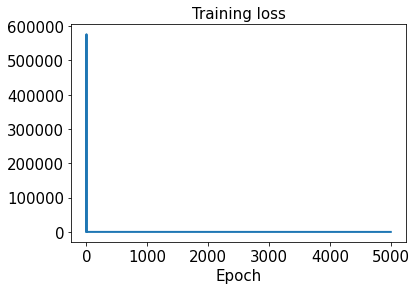

In [9]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

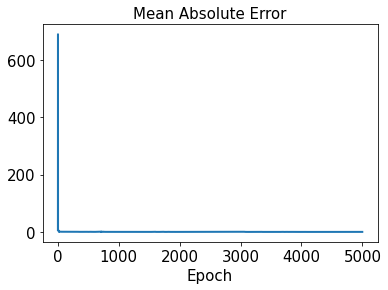

In [10]:
plt.plot(hist['mae'], lw=2)
plt.title('Mean Absolute Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [11]:
test_results = autoencoder.evaluate([x_test, tsr_test])

1/1 [==============================] - 0s 134ms/step - loss: 0.0098 - mae: 0.0000e+00 - mape: 0.0000e+00 - rmse: 0.0000e+00 - msle: 0.0000e+00


In [12]:
decoded_imgs = autoencoder.predict([x_test, tsr_test])

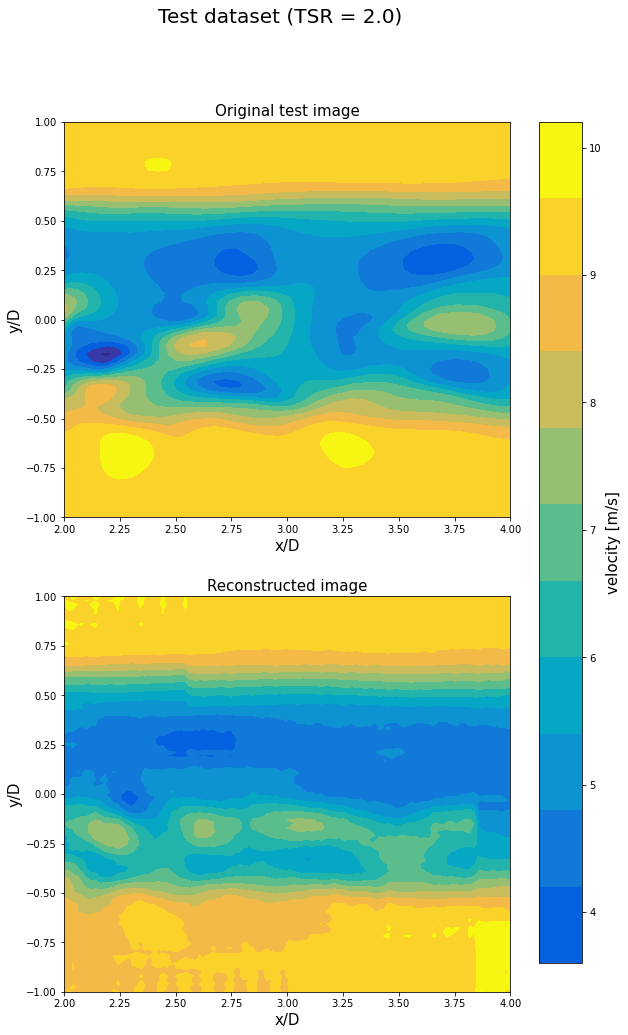

In [13]:
plt.figure(figsize=(8, 16))
xtest_rotate = x_test.T.reshape(100, 100)
decoded_rotate = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(2, 1, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, xtest_rotate.T, vmin=3, vmax=10, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(2, 1, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate.T, vmin=3, vmax=10, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.075, 0.73])
cbar = plt.colorbar(a2, cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)
cbar.set_ticks([3, 4, 5, 6, 7, 8, 9, 10])

plt.suptitle('Test dataset (TSR = 2.0)',fontsize=20)
plt.show()

In [14]:
error_test = np.abs(decoded_imgs - x_test) / x_test * 100
print(error_test)

[[[[9.458935  ]
   [7.64532   ]
   [6.1011558 ]
   ...
   [0.67401797]
   [3.552249  ]
   [4.875939  ]]

  [[3.6202366 ]
   [6.394879  ]
   [6.844192  ]
   ...
   [3.1426232 ]
   [1.1701378 ]
   [0.6502932 ]]

  [[8.38623   ]
   [3.9625719 ]
   [6.037818  ]
   ...
   [1.5351691 ]
   [0.02994329]
   [2.709666  ]]

  ...

  [[7.5024424 ]
   [3.207314  ]
   [3.7474911 ]
   ...
   [0.08296041]
   [0.01637096]
   [0.17257506]]

  [[3.0333388 ]
   [7.735391  ]
   [4.5184145 ]
   ...
   [0.45433176]
   [0.6483028 ]
   [3.3374038 ]]

  [[0.01037362]
   [2.7716768 ]
   [3.715525  ]
   ...
   [0.45488775]
   [4.272268  ]
   [3.628219  ]]]]


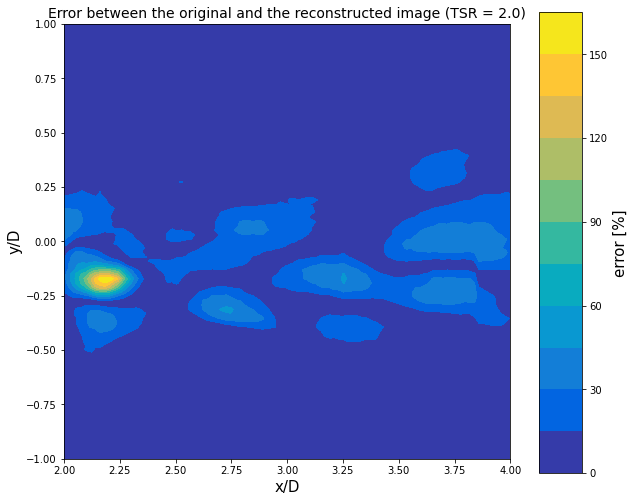

In [15]:
error_test_rotate = error_test.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_rotate.T, levels=11, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 2.0)', fontsize=14)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('error [%]', fontsize=15)

plt.show()

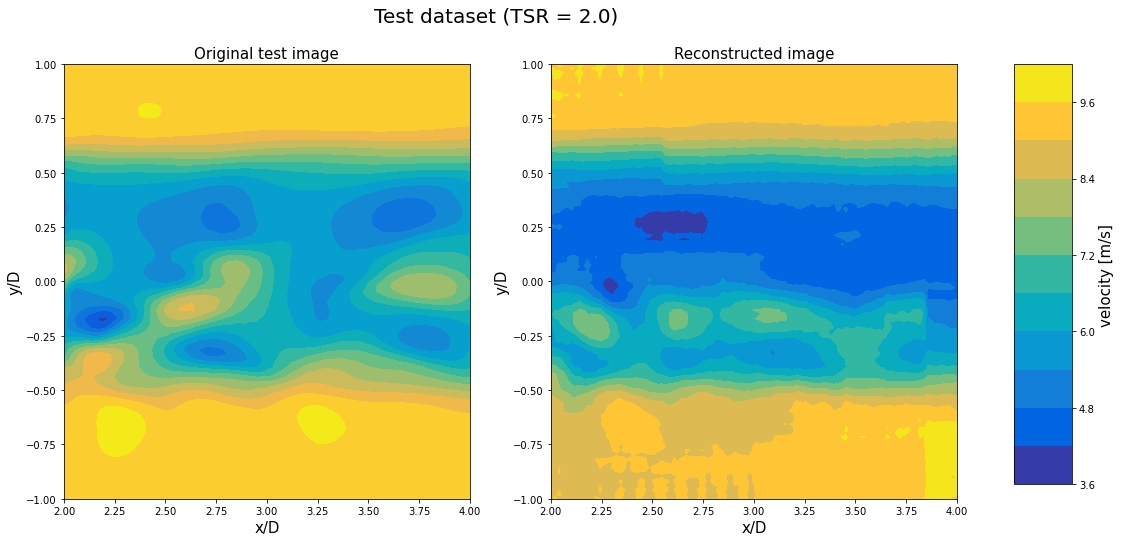

In [16]:
plt.figure(figsize=(16, 8))
xtest_rotate2 = x_test.T.reshape(100, 100)
decoded_rotate2 = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, xtest_rotate2.T, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, decoded_rotate2.T, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.05, 0.73])
cbar = plt.colorbar(cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)

plt.suptitle('Test dataset (TSR = 2.0)',fontsize=20)
plt.show()

In [17]:
train0 = x_train[0].reshape(1, 100, 100, 1)
train_decode0 = autoencoder.predict([train0, tsr_train[0]]).reshape(100, 100)
print(train_decode0.shape)

(100, 100)


In [18]:
train0_orig = x_train[0].reshape(100, 100)

In [19]:
error_train0 = np.abs(train_decode0 - train0_orig) / train0_orig * 100

In [20]:
print(error_train0)

[[6.6709833  4.6292787  3.6404555  ... 2.5006979  6.8090096  1.926783  ]
 [0.01884329 2.462064   3.5847096  ... 6.4453564  1.9489751  2.4416955 ]
 [5.3348184  0.6367454  3.470476   ... 4.7893763  3.1298804  5.9094734 ]
 ...
 [7.0334024  2.840167   3.4613981  ... 0.55818284 0.5108339  0.91451824]
 [3.3963516  7.4216337  4.3013887  ... 0.7038962  1.11819    3.9256594 ]
 [0.29209366 2.5466049  3.5711653  ... 0.47617304 4.842015   4.229508  ]]


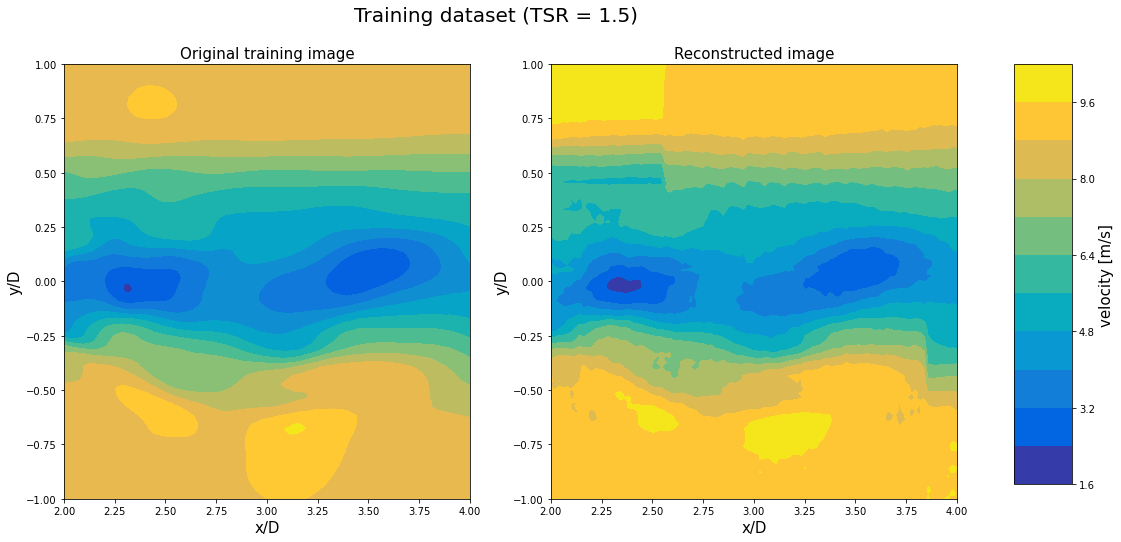

In [21]:
plt.figure(figsize=(16, 8))

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, train0_orig, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original training image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, train_decode0, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.05, 0.73])
cbar = plt.colorbar(cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)

plt.suptitle('Training dataset (TSR = 1.5)',fontsize=20)
plt.show()

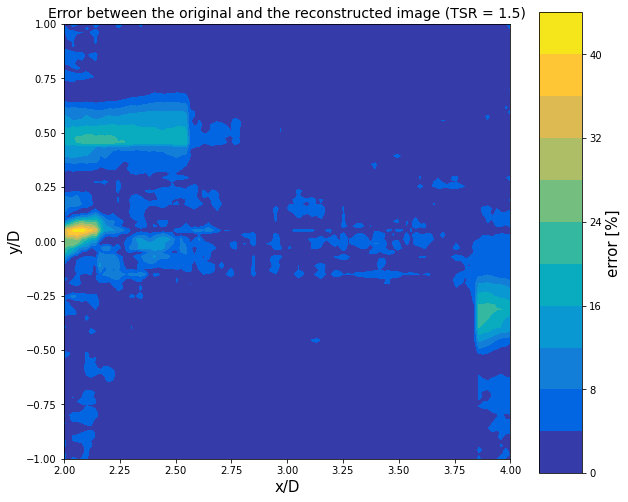

In [22]:
error_train0_rotate = error_train0.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train0_rotate.T, levels=11, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 1.5)', fontsize=14)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('error [%]', fontsize=15)

plt.show()

In [23]:
print(np.mean(error_train0))

3.1183817


In [24]:
print(np.max(error_train0))

42.37978


In [25]:
print(np.mean(error_test))

8.7410755


In [26]:
print(np.max(error_test))

163.31058
